In [1]:
import os
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import StepLR
import torchvision as tv
import timm
import pandas as pd
import numpy as np
import cv2
import re

device='cuda'
sim_dir = os.listdir('all_sims')
file_dir = os.listdir('all_traj_files')
# Custom sorting key function
def interpolate_vectors(vector, target_length):
    current_length = len(vector)
    # Create a new x-axis with the desired length
    new_x = np.linspace(0, current_length - 1, target_length)
    # Create the old x-axis based on the current length
    old_x = np.arange(current_length)
    # Perform linear interpolation
    interpolated_vector = np.interp(new_x, old_x, vector)
    return interpolated_vector
    
def sort_key(item):
    if '_brown' in item:
        return (1, int(item[3:-6]))
    else:
        return (0, int(item[3:]))

# Sort the list using the custom key
sorted_sim_dir = sorted(sim_dir, key=sort_key)

print(sorted_sim_dir)



# Custom sorting key function
def sort_key2(item):
    if '_brown' in item:
        return (1, int(item[6:-10]))  # Extract the numeric part for files with '_brown'
    else:
        return (0, int(item[6:-4]))  # Extract the numeric part for files without '_brown'

# Sort the list using the custom key
sorted_file_dir = sorted(file_dir, key=sort_key2)

# Split the sorted list into 'yc_' and 'xc_' files
yc_files = [f for f in sorted_file_dir if f.startswith('yc_')]
xc_files = [f for f in sorted_file_dir if f.startswith('xc_')]

# Create a list of lists with corresponding 'yc_' and 'xc_' files
sorted_file_pairs = [[yc, xc] for yc, xc in zip(yc_files, xc_files)]

print(sorted_file_pairs)

test_dirs = sorted_file_pairs[0::4]
print(len(test_dirs))

train_dirs = sorted_file_pairs[1::4]+sorted_file_pairs[2::4]+sorted_file_pairs[3::4]
print(len(train_dirs))

test_image_files = sorted_sim_dir[0::4]


train_image_files = sorted_sim_dir[1::4]+sorted_sim_dir[2::4]+sorted_sim_dir[3::4]


#torch.set_default_dtype(torch.float16)
k=40


s=384
# images_train = torch.zeros(len(train_image_files),k,s, s)
# images_test = torch.zeros(len(test_image_files),k,s, s)
# for i in range(len(train_image_files)):
#     base = 'all_sims/'+train_image_files[i]
#     im_dir = os.listdir(base)
#     im_dir = sorted(im_dir, key=lambda x: int(re.findall(r'\d+', x)[0]))
#     for j in range(k):
#         images_train[i,j,:,:] = torch.tensor(cv2.resize(cv2.imread(base+'/'+im_dir[j], cv2.IMREAD_GRAYSCALE),(s,s)))


# for i in range(len(test_image_files)):
#     base = 'all_sims/'+test_image_files[i]
#     im_dir = os.listdir(base)
#     im_dir = sorted(im_dir, key=lambda x: int(re.findall(r'\d+', x)[0]))
#     for j in range(k):
#         images_test[i,j,:,:] = torch.tensor(cv2.resize(cv2.imread(base+'/'+im_dir[j], cv2.IMREAD_GRAYSCALE),(s,s)))
        


base='all_traj_files/'
print(base)


['sim61', 'sim62', 'sim63', 'sim64', 'sim65', 'sim66', 'sim67', 'sim68', 'sim69', 'sim70', 'sim71', 'sim72', 'sim73', 'sim74', 'sim75', 'sim76', 'sim77', 'sim78', 'sim79', 'sim80', 'sim81', 'sim82', 'sim83', 'sim84', 'sim85', 'sim86', 'sim87', 'sim88', 'sim89', 'sim90', 'sim91', 'sim92', 'sim93', 'sim94', 'sim95', 'sim96', 'sim97', 'sim98', 'sim99', 'sim100', 'sim101', 'sim102', 'sim103', 'sim104', 'sim105', 'sim106', 'sim107', 'sim108', 'sim109', 'sim110', 'sim111', 'sim112', 'sim113', 'sim114', 'sim115', 'sim116', 'sim117', 'sim118', 'sim119', 'sim120', 'sim121', 'sim122', 'sim123', 'sim124', 'sim125', 'sim126', 'sim127', 'sim128', 'sim129', 'sim130', 'sim131', 'sim132', 'sim133', 'sim134', 'sim135', 'sim136', 'sim137', 'sim138', 'sim139', 'sim140', 'sim141', 'sim142', 'sim143', 'sim144', 'sim145', 'sim146', 'sim147', 'sim148', 'sim149', 'sim150', 'sim151', 'sim152', 'sim153', 'sim154', 'sim155', 'sim156', 'sim157', 'sim158', 'sim159', 'sim161', 'sim162', 'sim163', 'sim164', 'sim165'

In [2]:
x_arr.iloc[:,6]

NameError: name 'x_arr' is not defined

In [16]:
i=0
x_arr= pd.read_csv(base+train_dirs[i][1], header=None)
np.diff(x_arr.iloc[:,6])

array([14.62182391, 12.17433874, 13.21595656, 12.00066689,  8.7410789 ,
        3.44857341,  4.61456671,  4.52813675,  5.05791738, 15.04372517,
       21.34371632, 37.41609803, 73.37385912,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan])

In [6]:
x_arr.diff()

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.584958,3.099648,1.672213,0.060897,1.449214,2.514155,1.663173,1.329718,0.509121,2.503848,...,1.213774,10.459768,-0.000498,0.002600,0.038310,3.476031,0.533587,0.879472,7.100479,3.204624
2,1.658570,3.450474,1.737516,0.025376,1.327243,3.022947,1.729803,1.392993,0.486164,2.351001,...,1.225288,10.091033,0.020513,-0.013352,0.082607,3.222827,0.512615,0.873018,6.830726,3.270730
3,1.594318,3.939395,1.722573,0.006087,1.350263,3.521404,1.806255,1.429337,0.440721,2.226343,...,1.223397,10.136003,0.030151,0.023723,0.056206,3.087905,0.492059,0.859374,7.104070,3.424317
4,1.651043,4.420339,1.772918,0.048634,1.289190,4.241036,1.854847,1.419524,0.317253,2.074009,...,1.222299,10.524602,-0.024018,-0.000548,0.062125,3.239768,0.485056,0.870529,8.023257,3.516416
5,1.679351,5.104165,1.738679,0.162141,1.274221,4.949276,1.918466,1.432225,0.317371,1.955911,...,1.251909,11.627108,-0.005817,0.041511,0.124195,3.327128,0.525289,0.963413,9.446991,3.699380
6,1.613073,5.740192,1.856360,0.332715,1.309285,5.846557,1.960171,1.519895,0.195136,1.789382,...,1.184968,13.643466,-0.013185,-0.025796,0.176490,3.209498,0.460200,0.945406,11.415446,3.936463
7,1.695990,6.534044,1.780871,0.509202,1.231233,6.831439,2.100994,1.521506,0.213325,1.617448,...,1.191300,16.504796,0.018518,0.046150,0.134593,2.728988,0.530610,0.918191,13.615165,4.152185
8,1.713178,7.423473,1.827796,0.721208,1.308207,8.044853,2.094228,1.545434,0.075795,1.456514,...,1.246283,19.698238,0.009193,-0.015136,0.216963,2.174973,0.471233,0.971863,14.929434,4.438731
9,1.771865,8.383654,1.901653,1.047143,1.378487,9.496716,2.283620,1.616809,0.039707,1.269896,...,1.195721,19.903154,0.013188,0.032761,0.230366,1.758153,0.611033,1.060688,14.245141,4.699442


In [3]:
train_dirs = np.array(train_dirs)
target_length=500
xdiffs=[]
ydiffs=[]

#def calculate_angles(train_dirs):
#angle_tensor = np.zeros([len(train_dirs),target_length])
angles=[]
for i in range(len(train_dirs)):
    x_arr= pd.read_csv(base+train_dirs[i,1], header=None)
    y_arr= pd.read_csv(base+train_dirs[i,0], header=None)


    xdiff=x_arr.diff()
    ydiff=y_arr.diff()
    for i in range(len(ydiff)-1):
        for j in range(ydiff.shape[1]-1):
            #print(ydiff.iloc[i,j])

            theta1 = np.arctan2(ydiff.iloc[i,j],xdiff.iloc[i,j])

            theta2 = np.arctan(ydiff.iloc[i+1,j]/xdiff.iloc[i+1,j])
            #theta2=1
            turn_angle = ((theta2-theta1)*(180/np.pi))
            #print
        


In [16]:
np.arctan(ydiff.iloc[i+1,j]/xdiff.iloc[i+1,j])

0.1902024795478138

In [19]:
for i in range(ydiffs[0].shape[0]):
    print(ydiffs[0][i])

0          NaN
1    -3.007247
2     1.515353
3    -4.786220
4     0.311719
5    -0.884388
6    -8.952465
7    -2.063566
8    -2.772573
9    -1.928012
10   -1.617447
11    1.264075
12    3.335527
13    1.462610
14    2.324594
15    4.230934
16    4.916779
17    4.773577
18    1.409024
19    6.864391
20    4.058372
21    2.910675
22    4.391465
23    0.547438
24    2.533244
25    0.596221
26    6.846261
27   -1.603239
28   -1.709102
29    1.811348
30    1.736451
31   -0.279694
32   -2.483146
33    0.960335
34    0.342716
35   -1.232233
36    0.828302
37   -2.550901
38    0.601172
39   -1.682991
Name: 0, dtype: float64
0           NaN
1     21.350501
2     14.181428
3     10.410259
4      7.047212
5      4.328195
6     -6.268061
7      0.149235
8     12.053802
9     20.804026
10    16.143863
11    18.133740
12     6.553411
13    -4.687012
14    -8.678954
15   -15.115180
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23      

In [13]:
for i in range(len(xdiffs)):
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [12]:
ydiffs[0]
xdiffs[0]


,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,221
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-3.007247,21.350501,-13.045627,3.961443,4.986369,20.637065,23.780572,22.260880,-25.141152,-26.577969,...,33.200255,-0.346587,6.939756,1.735638,4.543642,12.711219,22.705603,-6.474004,-2.340289,0.990658
2,1.515353,14.181428,-13.385913,6.427420,6.186683,27.166419,27.418912,19.513388,-12.521232,-30.766592,...,35.521870,2.207306,0.909210,2.843252,3.209692,10.033005,8.754678,-12.640473,-15.396865,-7.032365
3,-4.786220,10.410259,-13.618155,4.243973,3.129716,28.533590,23.777165,23.097285,2.006134,-37.545083,...,20.360494,5.781988,3.748242,3.595376,3.900731,16.599186,1.950568,-13.675361,-18.877275,-0.760080
4,0.311719,7.047212,-12.297457,4.849980,1.024872,33.271575,20.937626,20.372459,17.208135,-35.938986,...,8.939574,5.591781,1.622929,6.534243,4.548381,19.046391,12.646398,-13.990290,-7.361539,0.488457
5,-0.884388,4.328195,-9.360864,5.133221,4.929883,28.852121,22.327876,19.886144,30.301690,-34.693806,...,16.762978,6.033745,0.011899,3.828685,2.003648,18.017350,34.505995,-14.608672,25.394512,-2.466616
6,-8.952465,-6.268061,-7.589469,1.857577,7.088944,27.580111,22.577984,28.856141,-23.407475,-21.823287,...,31.549233,9.043529,-0.596941,8.886966,3.874741,17.495306,28.804615,-16.544793,38.318481,-1.271483
7,-2.063566,0.149235,-3.607159,3.842237,6.472994,23.813462,23.791533,36.537612,NaN,-7.733163,...,22.614280,6.207034,-1.659286,7.896789,0.485738,21.827259,15.424839,-11.454579,42.360618,-2.489523
8,-2.772573,12.053802,-2.959188,0.748084,6.356397,14.742349,25.380478,-17.060562,NaN,2.398249,...,8.602810,8.793276,0.191843,10.793695,1.746331,18.773633,0.059951,-10.946951,26.617442,-0.336221
9,-1.928012,20.804026,10.829062,-1.456622,4.220783,13.349606,27.139523,NaN,NaN,33.949550,...,NaN,4.809503,-3.904096,10.291987,2.230031,19.074239,-7.126661,-8.198305,3.004372,-4.984516


In [7]:
    # for j in range(35):
    #     theta_1=np.arctan(ydiff[j]/xdiff[j])
        # theta_2=np.arctan(ydiff[j+1]/xdiff[j+1])
        # #print(j)
        # ang = pd.Series((theta_2-theta_1)*(180/np.pi))
        # ang=ang.dropna()
        # angles.append(ang)

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.522534,2.800222,1.583405,0.018567,1.313775,2.270695,1.487269,0.378808,1.256110,0.607154,...,7.694190,4.259166,3.058169,0.388257,3.848918,2.965570,0.010176,0.126166,2.601396,1.059801
2,1.457769,3.131894,1.548119,0.039288,1.242168,2.672876,1.511266,0.342426,1.226586,0.817013,...,7.856267,4.161292,2.774525,0.355697,2.837443,3.076476,0.042345,0.119733,2.132331,1.100649
3,1.467832,3.503708,1.553477,0.010060,1.237636,3.103427,1.551464,0.357281,1.232305,1.000762,...,8.329236,4.012868,2.657233,0.365888,2.005002,3.183032,0.016805,0.147442,1.695425,1.197152
4,1.489342,3.905845,1.623905,0.052369,1.189920,3.626583,1.586924,0.327902,1.153754,1.201331,...,9.060502,3.896914,2.503795,0.427886,1.377674,3.273697,-0.033431,0.107442,1.391663,1.261064
5,1.555761,4.418223,1.614368,0.137050,1.186998,4.283033,1.623823,0.390087,1.158386,1.271762,...,10.280810,3.913936,2.407194,0.448507,1.053971,3.389594,0.006722,0.136883,1.367122,1.421762
6,1.476367,4.969516,1.635583,0.188479,1.170875,4.890109,1.677244,0.434387,1.178757,1.415139,...,12.096032,3.893790,2.383569,0.458169,0.765843,3.460590,0.041822,0.100767,1.458306,1.476839
7,1.510887,5.578928,1.635761,0.353490,1.160562,5.718733,1.733874,0.413293,1.161013,1.584606,...,14.377958,3.911164,2.350155,0.458919,0.631258,3.589919,0.016597,0.087069,1.587699,1.587411
8,1.552125,6.335605,1.725620,0.521824,1.175026,6.648806,1.719888,0.416289,1.141878,1.620687,...,16.335567,4.022155,2.254589,0.507118,0.721998,3.732311,-0.022798,0.111510,1.849527,1.723374
9,1.611403,7.023353,1.642722,0.738732,1.173329,7.667108,1.882430,0.429839,1.046895,1.747750,...,16.342096,4.025289,2.379935,0.478920,0.859239,3.827558,0.008233,0.099928,2.122720,1.826013


In [4]:
i

0

In [1]:
import os

sim_dir = os.listdir('all_sims')
file_dir = os.listdir('all_traj_files')
# Custom sorting key function
def sort_key(item):
    if '_brown' in item:
        return (1, int(item[3:-6]))
    else:
        return (0, int(item[3:]))

# Sort the list using the custom key
sorted_sim_dir = sorted(sim_dir, key=sort_key)

print(sorted_sim_dir)

import os


# Custom sorting key function
def sort_key2(item):
    if '_brown' in item:
        return (1, int(item[6:-10]))  # Extract the numeric part for files with '_brown'
    else:
        return (0, int(item[6:-4]))  # Extract the numeric part for files without '_brown'

# Sort the list using the custom key
sorted_file_dir = sorted(file_dir, key=sort_key2)

# Split the sorted list into 'yc_' and 'xc_' files
yc_files = [f for f in sorted_file_dir if f.startswith('yc_')]
xc_files = [f for f in sorted_file_dir if f.startswith('xc_')]

# Create a list of lists with corresponding 'yc_' and 'xc_' files
sorted_file_pairs = [[yc, xc] for yc, xc in zip(yc_files, xc_files)]

print(sorted_file_pairs)

test_dirs = sorted_file_pairs[0::4]
len(test_dirs)

train_dirs = sorted_file_pairs[1::4]+sorted_file_pairs[2::4]+sorted_file_pairs[3::4]
len(train_dirs)

test_image_files = sorted_sim_dir[0::4]
test_image_files

train_image_files = sorted_sim_dir[1::4]+sorted_sim_dir[2::4]+sorted_sim_dir[3::4]
train_image_files

['sim61', 'sim62', 'sim63', 'sim64', 'sim65', 'sim66', 'sim67', 'sim68', 'sim69', 'sim70', 'sim71', 'sim72', 'sim73', 'sim74', 'sim75', 'sim76', 'sim77', 'sim78', 'sim79', 'sim80', 'sim81', 'sim82', 'sim83', 'sim84', 'sim85', 'sim86', 'sim87', 'sim88', 'sim89', 'sim90', 'sim91', 'sim92', 'sim93', 'sim94', 'sim95', 'sim96', 'sim97', 'sim98', 'sim99', 'sim100', 'sim101', 'sim102', 'sim103', 'sim104', 'sim105', 'sim106', 'sim107', 'sim108', 'sim109', 'sim110', 'sim111', 'sim112', 'sim113', 'sim114', 'sim115', 'sim116', 'sim117', 'sim118', 'sim119', 'sim120', 'sim121', 'sim122', 'sim123', 'sim124', 'sim125', 'sim126', 'sim127', 'sim128', 'sim129', 'sim130', 'sim131', 'sim132', 'sim133', 'sim134', 'sim135', 'sim136', 'sim137', 'sim138', 'sim139', 'sim140', 'sim141', 'sim142', 'sim143', 'sim144', 'sim145', 'sim146', 'sim147', 'sim148', 'sim149', 'sim150', 'sim151', 'sim152', 'sim153', 'sim154', 'sim155', 'sim156', 'sim157', 'sim158', 'sim159', 'sim161', 'sim162', 'sim163', 'sim164', 'sim165'

['sim62',
 'sim66',
 'sim70',
 'sim74',
 'sim78',
 'sim82',
 'sim86',
 'sim90',
 'sim94',
 'sim98',
 'sim102',
 'sim106',
 'sim110',
 'sim114',
 'sim118',
 'sim122',
 'sim126',
 'sim130',
 'sim134',
 'sim138',
 'sim142',
 'sim146',
 'sim150',
 'sim154',
 'sim158',
 'sim163',
 'sim167',
 'sim171',
 'sim175',
 'sim179',
 'sim183',
 'sim187',
 'sim191',
 'sim195',
 'sim199',
 'sim203',
 'sim207',
 'sim211',
 'sim215',
 'sim219',
 'sim223',
 'sim227',
 'sim231',
 'sim235',
 'sim239',
 'sim243',
 'sim247',
 'sim1_brown',
 'sim5_brown',
 'sim9_brown',
 'sim13_brown',
 'sim17_brown',
 'sim21_brown',
 'sim25_brown',
 'sim29_brown',
 'sim33_brown',
 'sim37_brown',
 'sim41_brown',
 'sim45_brown',
 'sim49_brown',
 'sim53_brown',
 'sim57_brown',
 'sim61_brown',
 'sim65_brown',
 'sim69_brown',
 'sim73_brown',
 'sim77_brown',
 'sim81_brown',
 'sim85_brown',
 'sim89_brown',
 'sim93_brown',
 'sim97_brown',
 'sim63',
 'sim67',
 'sim71',
 'sim75',
 'sim79',
 'sim83',
 'sim87',
 'sim91',
 'sim95',
 'sim9

In [2]:
import pandas as pd
import numpy as np
import cv2
import os
import torch
import re
#torch.set_default_dtype(torch.float16)
k=40


s=384
images_train = torch.zeros(len(train_image_files),k,s, s)
images_test = torch.zeros(len(test_image_files),k,s, s)
for i in range(len(train_image_files)):
    base = 'all_sims/'+train_image_files[i]
    im_dir = os.listdir(base)
    im_dir = sorted(im_dir, key=lambda x: int(re.findall(r'\d+', x)[0]))
    for j in range(k):
        images_train[i,j,:,:] = torch.tensor(cv2.resize(cv2.imread(base+'/'+im_dir[j], cv2.IMREAD_GRAYSCALE),(s,s)))


for i in range(len(test_image_files)):
    base = 'all_sims/'+test_image_files[i]
    im_dir = os.listdir(base)
    im_dir = sorted(im_dir, key=lambda x: int(re.findall(r'\d+', x)[0]))
    for j in range(k):
        images_test[i,j,:,:] = torch.tensor(cv2.resize(cv2.imread(base+'/'+im_dir[j], cv2.IMREAD_GRAYSCALE),(s,s)))
        
im_dir

['Fig_1.jpg',
 'Fig_2.jpg',
 'Fig_3.jpg',
 'Fig_4.jpg',
 'Fig_5.jpg',
 'Fig_6.jpg',
 'Fig_7.jpg',
 'Fig_8.jpg',
 'Fig_9.jpg',
 'Fig_10.jpg',
 'Fig_11.jpg',
 'Fig_12.jpg',
 'Fig_13.jpg',
 'Fig_14.jpg',
 'Fig_15.jpg',
 'Fig_16.jpg',
 'Fig_17.jpg',
 'Fig_18.jpg',
 'Fig_19.jpg',
 'Fig_20.jpg',
 'Fig_21.jpg',
 'Fig_22.jpg',
 'Fig_23.jpg',
 'Fig_24.jpg',
 'Fig_25.jpg',
 'Fig_26.jpg',
 'Fig_27.jpg',
 'Fig_28.jpg',
 'Fig_29.jpg',
 'Fig_30.jpg',
 'Fig_31.jpg',
 'Fig_32.jpg',
 'Fig_33.jpg',
 'Fig_34.jpg',
 'Fig_35.jpg',
 'Fig_36.jpg',
 'Fig_37.jpg',
 'Fig_38.jpg',
 'Fig_39.jpg',
 'Fig_40.jpg']

torch.Size([216, 40, 384, 384])

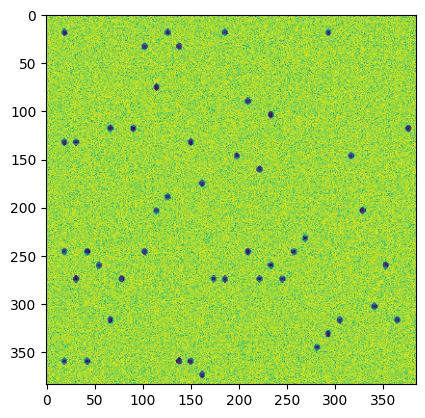

In [3]:
import matplotlib.pyplot as plt
plt.imshow(images_train[96,0,:,:])
images_train.shape

In [4]:
import gc
del im_dir
gc.collect()

3301

In [ ]:

import matplotlib.pyplot as plt
from scipy.stats import exponweib,lognorm, johnsonsb,expon
import torch
import numpy as np

def calculate_angles(x_arr, y_arr):
    traj_stats=[]
    for n in range(x_arr.shape[1]):
        x_diff = np.diff(x_arr[:,n])
        y_diff = np.diff(y_arr[:,n])
        angles=np.zeros((len(x_diff),1))
        for i in range(len(x_diff)-1):
            theta_1=np.arctan(y_diff[i]/x_diff[i])
            theta_2=np.arctan(y_diff[i+1]/x_diff[i+1])
            angles[i]=(theta_2-theta_1)*(180/np.pi)
    
        traj_stats.append([n, angles])
    angle_array=[]
    vel_array=[]
    for i in range(len(traj_stats)):
        section1=traj_stats[i][1]
        section1=np.reshape(section1,(len(section1),))
        angle_array=np.hstack([section1,angle_array])
    
    angle_array
    angle_array=np.abs(angle_array[~np.isnan(angle_array)])
    angle_array = interpolate_vectors(np.sort(angle_array), target_length)
    angle_array[angle_array==0]=0.1
    return angle_array
    
def interpolate_vectors(vector, target_length):
    current_length = len(vector)
    # Create a new x-axis with the desired length
    new_x = np.linspace(0, current_length - 1, target_length)
    # Create the old x-axis based on the current length
    old_x = np.arange(current_length)
    # Perform linear interpolation
    interpolated_vector = np.interp(new_x, old_x, vector)
    return interpolated_vector
    
#k=100
# train_dirs=[["xc_500part_4xspeed.csv","yc_500part_4xspeed.csv"],["xc_2000part_4xspeed.csv","yc_2000part_4xspeed.csv"],
#             ["xc_2000part_16xspeed.csv","yc_2000part_16xspeed.csv"],["xc_2000part_32xspeed.csv","yc_2000part_32xspeed.csv"],
#            ["xc_1000part_16xspeed.csv","yc_1000part_16xspeed.csv"],["xc_500part_32xspeed.csv","yc_500part_32xspeed.csv"],
#            ["xc_1000part_32xspeed.csv","yc_1000part_32xspeed.csv"], ['yc_sim2.csv','xc_sim2.csv'], ['yc_sim11.csv','xc_sim11.csv'],
#             ['yc_sim12.csv','xc_sim12.csv'],['yc_sim13.csv','xc_sim13.csv'],['yc_sim14.csv','xc_sim14.csv'],['yc_sim15.csv','xc_sim15.csv'],
#             ['yc_sim19.csv','xc_sim19.csv'],['yc_sim20.csv','xc_sim20.csv'],['yc_sim21.csv','xc_sim21.csv'],['yc_sim22.csv','xc_sim22.csv'],
#             ['yc_sim23.csv','xc_sim23.csv'],['yc_sim24.csv','xc_sim24.csv'],['yc_sim25.csv','xc_sim25.csv'],
#             ['yc_sim35.csv','xc_sim35.csv'],['yc_sim36.csv','xc_sim36.csv'],['yc_sim46.csv','xc_sim46.csv'],['yc_sim62.csv','xc_sim62.csv'],
#             ['yc_sim63.csv','xc_sim63.csv'],['yc_sim64.csv','xc_sim64.csv'],['yc_sim65.csv','xc_sim65.csv'],['yc_sim66.csv','xc_sim66.csv'],
#             ['yc_sim67.csv','xc_sim67.csv'],
#             ['yc_sim16.csv','xc_sim16.csv']]
# train_dirs=[['yc_sim62.csv','xc_sim62.csv'],['yc_sim63.csv','xc_sim63.csv'],['yc_sim64.csv','xc_sim64.csv'],['yc_sim66.csv','xc_sim66.csv'],
#             ['yc_sim67.csv','xc_sim67.csv'],['yc_sim68.csv','xc_sim68.csv'],['yc_sim69.csv','xc_sim69.csv'],
#             ['yc_sim72.csv','xc_sim72.csv'],['yc_sim73.csv','xc_sim73.csv'],['yc_sim74.csv','xc_sim74.csv'],['yc_sim76.csv','xc_sim76.csv'],
#             ['yc_sim77.csv','xc_sim77.csv'],['yc_sim78.csv','xc_sim78.csv'],['yc_sim79.csv','xc_sim79.csv'],
#             ['yc_sim82.csv','xc_sim82.csv'],['yc_sim83.csv','xc_sim83.csv'],['yc_sim84.csv','xc_sim84.csv'],['yc_sim86.csv','xc_sim86.csv'],
#             ['yc_sim87.csv','xc_sim87.csv'],['yc_sim88.csv','xc_sim88.csv'],['yc_sim89.csv','xc_sim89.csv'],
# ]

train_dirs[0]

# xtorch = torch.zeros(len(train_dirs),1000)
# distr_torch = torch.zeros(len(train_dirs),1000)
scales = torch.zeros(len(train_dirs),2)
# i=0
base='all_traj_files/'
target_length=500
angles = torch.zeros(len(train_dirs),target_length)
for i in range(len(train_dirs)):
    x_arr= np.array(pd.read_csv(base+train_dirs[i][1], header=None))
    y_arr= np.array(pd.read_csv(base+train_dirs[i][0], header=None))
    angle_array = calculate_angles(x_arr,y_arr)

    angles[i,:] = torch.tensor(angle_array)
    
    a,b = expon.fit(angle_array)
    
    # Generate points for plotting the fitted distribution
    xtorch= np.linspace(expon.ppf(0.01, a,b),
                    expon.ppf(0.99, a,b), target_length)
    
    distr_torch=expon.pdf(xtorch, a,b)
    scales[i,:] = torch.tensor([a,b])
    plt.plot(xtorch,distr_torch)
    #plt.show()
    
    

# images_train = images_train/255
# images_test = images_test/255
#torch.max(scales,dim=0)[0]

In [ ]:
# import numpy as np
# from scipy import stats
# from joblib import Parallel, delayed
# import matplotlib.pyplot as plt
# angle_array[angle_array==0]=0.1

# def fit_distribution(data, dist):
#     params = dist.fit(data)
#     nll = (-np.sum(dist.logpdf(data, *params)))/len(data)
#     return dist, params, nll

# def find_best_distribution(data):
#     distributions = [
#         stats.genexpon, stats.genpareto, stats.johnsonsb, stats.invweibull,
#         stats.expon, stats.maxwell, stats.johnsonsu, stats.norminvgauss,
#         stats.gompertz, stats.wald, stats.powerlognorm, stats.vonmises
#     ]
    
#     results = Parallel(n_jobs=12)(delayed(fit_distribution)(data, dist) for dist in distributions)
#     return results


# # Example usage

# results = find_best_distribution(angle_array)


In [ ]:
# fig, axs = plt.subplots(4, 3, figsize=(15, 15))
# axs = axs.ravel()

# for i, (dist, params, sse) in enumerate(results):
#     x = np.linspace(angle_array.min(), angle_array.max(), 100)
#     axs[i].hist(angle_array, bins=100, density=True, alpha=0.6, color='blue')
#     axs[i].plot(x, dist.pdf(x, *params), 'r-', lw=2, label=f'Fit: {dist.name}')
#     axs[i].legend(loc='best')
#     axs[i].set_title(f'{dist.name} (NLL = {sse:.4f})')
#     axs[i].set_xlabel('Data')
#     axs[i].set_ylabel('Probability Density')

# plt.tight_layout()
# plt.show()

In [ ]:
# from joblib.externals.loky import get_reusable_executor
# get_reusable_executor().shutdown(wait=True)

In [ ]:
# xtorch_test = torch.zeros(len(test_dirs),1000)
# distr_torch_test = torch.zeros(len(test_dirs),1000)

# test_dirs=[["xc_1000part_4xspeed.csv","yc_1000part_4xspeed.csv"],["xc_500part_16xspeed.csv","yc_500part_16xspeed.csv"],
#           ['yc_sim17.csv','xc_sim17.csv'],['yc_sim18.csv','xc_sim18.csv'], ['yc_sim40.csv','xc_sim40.csv'], ['yc_sim41.csv','xc_sim41.csv'], 
#            ['yc_sim42.csv','xc_sim42.csv'], ['yc_sim43.csv','xc_sim43.csv'], ['yc_sim44.csv','xc_sim44.csv'], ['yc_sim45.csv','xc_sim45.csv'],
#            ['yc_sim69.csv','xc_sim69.csv'],['yc_sim70.csv','xc_sim70.csv'],
# ]
# test_dirs=[ ['yc_sim61.csv','xc_sim61.csv'], ['yc_sim65.csv','xc_sim65.csv'],['yc_sim70.csv','xc_sim70.csv'],
#            ['yc_sim71.csv','xc_sim71.csv'], ['yc_sim75.csv','xc_sim75.csv'],['yc_sim80.csv','xc_sim80.csv'],
#            ['yc_sim81.csv','xc_sim81.csv'], ['yc_sim85.csv','xc_sim85.csv'],['yc_sim90.csv','xc_sim90.csv'],
# ]
scales_test = torch.zeros(len(test_dirs),2)
# target_length=1000
angles_test = torch.zeros(len(test_dirs),target_length)
for i in range(len(test_dirs)):
    x_arr= np.array(pd.read_csv(base+test_dirs[i][1], header=None))
    y_arr= np.array(pd.read_csv(base+test_dirs[i][0], header=None))
    angle_array = calculate_angles(x_arr,y_arr)

    angles_test[i,:] = torch.tensor(angle_array)
    
    a,b = expon.fit(angle_array)
    
    # Generate points for plotting the fitted distribution
    xtorch= np.linspace(expon.ppf(0.01, a,b),
                    expon.ppf(0.99, a,b), target_length)
    
    distr_torch=expon.pdf(xtorch, a,b)
    scales_test[i,:] = torch.tensor([a,b])
    plt.plot(xtorch,distr_torch)
    #plt.show()
# torch.max(scales_test,dim=0)

In [ ]:
from torch import nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        l=200
        self.fc2=nn.Conv2d(100, l, 1, stride=2)
        #self.m1 = nn.BatchNorm1d(1000)
        self.d1 = nn.Dropout(.2)
        self.fc1=nn.Conv2d(40, 100, 1, stride=2)
        #self.m2 = nn.BatchNorm1d(l)
        self.d2 = nn.Dropout(.2)
       # self.fc2 = nn.Linear(800,l)
       # self.fc3=nn.Linear(2000,800)
       # self.fc4 = nn.Linear(800,l)
        self.fc5 = nn.Conv2d(l, 5,1, stride=1)
        #self.m3 = nn.BatchNorm1d(100)
        self.fc6 = nn.Linear(312500,1000)
        self.d3 = nn.Dropout(.2)
        self.fc7 = nn.Linear(100,4)
        self.fc8 = nn.Linear(2000,1000)

    def forward(self, x):
        b = x.shape[0]
        x = x.squeeze()
        
        l=200
        x = F.relu(self.fc1(x))
        #x = self.m1(x)
        x = self.d1(x)
        x = F.relu(self.fc2(x))
        #x = self.m2(x)
        x = self.d2(x)
        #x = x.permute(0,2,1)
        #x = F.relu(self.fc3(x))
        #x = F.relu(self.fc4(x))
        
        #x = x.view(b,l*666)
        x = F.relu(self.fc5(x))
        #x = self.m3(x)
        x = x.reshape(b, -1)
        #x = F.relu(self.fc4(x))
        x = (self.fc6(x))
        # x = self.d3(x)
        # #x = torch.flatten(x)
        # x = (self.fc8(x))
        # x = x.reshape(2,200)
        #x = self.fc7(x)
        #output = nn.functional.log_softmax(x, dim=1)
        return x
    
    
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.m1 = timm.create_model('regnetx_016', in_chans=40, drop_path_rate=.0,num_classes=4000,pretrained=True)

        self.fc1=nn.Linear(4000,1000)
        self.fc2 = nn.Linear(1000,1000)

        self.fc3=nn.Linear(4000,10)
        self.fc3_2=nn.Linear(10,1)
        self.fc4=nn.Linear(4000,10)
        self.fc4_2=nn.Linear(10,1)
        self.fc5=nn.Linear(4000,10)
        self.fc5_2=nn.Linear(10,1)

    def forward(self, x):
        x = self.m1(x)
        
        x1 = F.gelu(self.fc1(x))
        x1 = self.fc2(x1)

        x2 = F.gelu(self.fc3(x))
        x2 = self.fc3_2(x2)
        x3 = F.gelu(self.fc4(x))
        x3 = self.fc4_2(x3)


        return x1,x2,x3
    
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        l=80

        self.fc1=nn.Linear(1000,l)
        self.d1 = nn.Dropout(.1)
        self.fc2=nn.Linear(1000,l)
        self.d2 = nn.Dropout(.1)
        self.fc3 = nn.Linear(40*l*l,1000)
        self.d3 = nn.Dropout(.1)
        self.fc4 = nn.Linear(1000,250)
        self.fc4_2 = nn.Linear(250,1000)
#         self.fc4_3 = nn.Linear(800,300)
#         self.fc5 = nn.Linear(300,30)
# #         self.fc5_2 = nn.Linear(200,100)
# #         self.fc5_3 = nn.Linear(100,30)
#         self.fc6 = nn.Linear(30,3)

    def forward(self, x):
        b = x.shape[0]
        x = F.relu(self.fc1(x))
        x = self.d1(x)
        x = x.permute(0,1,3,2)
        x = F.relu(self.fc2(x))
        x = self.d2(x)
        x = torch.reshape(x, [b,-1])
        x = F.relu(self.fc3(x))
        x = self.d3(x)
        x = F.relu(self.fc4(x))
        #x = torch.reshape(x, [b,10000])
        x = (self.fc4_2(x))
#         x = F.rrelu(self.fc4_3(x))
#         x = F.rrelu(self.fc5(x))
# #         x = F.rrelu(self.fc5_2(x))
# #         x = F.rrelu(self.fc5_3(x))
#         x = self.fc6(x)
        #x = torch.reshape(x, [b,2,100])
        #x = self.fc7(x)
        #output = nn.functional.log_softmax(x, dim=1)
        return x

In [ ]:
images_train = images_train/255
images_test = images_test/255

In [ ]:
# from ultralytics import YOLO

# # Load the pretrained YOLO model
# model = YOLO('yolov8n.pt')  # You can choose a different model variant if desired

# import torch
# import torch.nn as nn
# model.model.model[0].conv = nn.Conv2d(40, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
# model.model.model[-1].dfl = nn.Conv2d(16, 1000, kernel_size=(1, 1), stride=(1, 1), bias=False)
# model

In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

In [14]:
angles_test

tensor([[1.0000e-01, 1.0000e-01, 1.0000e-01,  ..., 1.7027e+02, 1.7313e+02,
         1.7865e+02],
        [1.0000e-01, 1.0000e-01, 1.0000e-01,  ..., 1.6882e+02, 1.7186e+02,
         1.7876e+02],
        [1.0000e-01, 1.0000e-01, 1.0000e-01,  ..., 1.6898e+02, 1.7131e+02,
         1.7788e+02],
        ...,
        [1.0000e-01, 1.0000e-01, 1.0000e-01,  ..., 1.6823e+02, 1.7265e+02,
         1.7881e+02],
        [1.0000e-01, 1.0000e-01, 1.0000e-01,  ..., 1.6900e+02, 1.7212e+02,
         1.7953e+02],
        [1.0000e-01, 1.0000e-01, 1.0000e-01,  ..., 1.6497e+02, 1.6950e+02,
         1.7629e+02]])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gc
from torch.optim.lr_scheduler import StepLR
import torchvision as tv
import timm
device='cuda'
# m1 = timm.create_model('regnety_016', in_chans=40, drop_path_rate=.0,num_classes=4000,pretrained=True)
# model=timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=True)#Net2()
# model.to(device)
# Define your custom dataset
model = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=True)
model.load_state_dict(torch.load('turn_angle_model_Volod1_384_dispBrown'))
model.to(device)
class TestDataset(Dataset):
    def __init__(self, images, x, scales):#x,y,scales):
        self.images = images
        self.x = x
        # self.y = y
        self.scales = scales

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index,:,:,:]
        #image  = tv.transforms.Resize(size=1000)(image)
        #image  = torch.tensor(image)
        x = self.x[index,:]
        # y = torch.tensor(self.y[index,:])
        # scales1 = self.scales[index,0]
        # scales2 = self.scales[index,1]
       # scales3 = self.scales[index,2]
        return image.float(), x.float()#,scales1.float(),scales2.float()#,y.float(),  scales.float()
import random
class TrainDataset(Dataset):
    def __init__(self, images, x, scales):#x,y,scales):
        self.images = images
        self.x = x
        # self.y = y
        self.scales = scales

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index,:,:,:]
        #image  = tv.transforms.Resize(size=1000)(image)
        # if random.random() < 0.5:
        #     scale_factor = random.uniform(.95, 1.05)
        #     image *= scale_factor
        if random.random() < 0.5:
            image = image.flip(dims=[-1]) 
        if random.random() < 0.5:
            image = image.flip(dims=[-2])  # Assuming W=50 is the middle axis for flipping

    # # Flip across the horizontal axis (H dimension) for input and label with a 50% chance
        if random.random() < 0.5:
            # # For input, assuming H=200 is the middle
            image = image.flip(dims=[-3])  # Flipping the last dimension (H)
            # # For label, assuming H=1000 is the middle
        

        x = self.x[index,:]
        # y = torch.tensor(self.y[index,:])
        # scales1 = self.scales[index,0]
        # scales2 = self.scales[index,1]
        #scales3 = self.scales[index,2]
        return image.float(), x.float()#,scales1.float(),scales2.float()#,y.float(),  scales.float()


# Define your model architecture

import torch
from torch.utils.data import DataLoader, Sampler
import numpy as np



# Assuming you have your grayscale images and labels loaded in memory
from torch.optim.lr_scheduler import ExponentialLR
# Create an instance of the custom dataset
# x = torch.nan_to_num(xc_data).unsqueeze(dim=2)
# y = torch.nan_to_num(yc_data).unsqueeze(dim=2)
# x_test = torch.nan_to_num(xc_data3).unsqueeze(dim=2)
# y_test = torch.nan_to_num(yc_data3).unsqueeze(dim=2)
# coords = torch.cat((x,y), dim=2)
# coords_test = torch.cat((x_test,y_test), dim=2)
#images = images[0:14,:,:]
# from sklearn.preprocessing import StandardScaler
# scalerx = StandardScaler()
# scalery = StandardScaler()
# # xtorch=scalerx.fit_transform(xtorch)
# # distr_torch=scalery.fit_transform(distr_torch)
# maxs = torch.max(scales)
# # mins = torch.min(scales)
# # print(maxs,mins)
# scales2 = (scales)/(maxs)
# # scales2 = (scales-mins)/(maxs-mins)

#maxs = torch.max(speeds)
#mins = torch.min(speeds)
#print(maxs,mins)
## scales_test2 = (scales_test)/(maxs)
#speeds2 = (speeds-mins)/(maxs-mins)

#maxs = torch.max(speeds_test)
#mins = torch.min(speeds_test)
#print(maxs,mins)
## scales_test2 = (scales_test)/(maxs)
#speeds_test2 = (speeds_test-mins)/(maxs-mins)
## xtorch_test=scalerx.transform(xtorch_test)
## distr_torch_test=scalery.transform(distr_torch_test)
dataset = TrainDataset(images_train, angles, scales)#xtorch, distr_torch,scales2)


# Create a dataloader
batch_size = 32
torch.cuda.empty_cache()
gc.collect()
#dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, drop_last=True)
# Create the GroupedSampler with a group size of 4
#sampler = GroupedSampler(dataset, group_size=batch_size)
#images3 = images3.unsqueeze(dim=0)
# Create the DataLoader with the GroupedSampler
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True,drop_last=False,num_workers=0)#,sampler=sampler)
dataset_test = TestDataset(images_test,angles_test, scales_test)#  xtorch_test, distr_torch_test, scales_test2)
batch_size = 10
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=False, num_workers=0)
#model = Net().to(device)
#model2 = Net2().to(device)
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(),lr=0.00006,weight_decay=.1)
#optimizer2 = optim.Adam(model2.parameters(), lr=0.00001)
gamma = .9995# The exponential decay factor (adjust as needed)
#scheduler1 = CosineAnnealingWarmRestarts(optimizer1, 200, 2)
scheduler = ExponentialLR(optimizer, gamma=gamma)
torch.cuda.empty_cache()
gc.collect()

# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for im,speed in dataloader:
        # Forward pass
        optimizer.zero_grad()
        outputs= model(im.to(device))
        #outputs2 = model2(outputs.to(device))
        # loss_xt = criterion(outputs[:,0,:].squeeze(), xt.squeeze().to(device))
        # loss_lab = criterion(outputs[:,1,:].squeeze(), lab.squeeze().to(device))
        # loss = criterion(outputs.squeeze(), scale.squeeze().to(device))
        #loss_end = criterion(outputs[:,-20:], speed[:,-20:].to(device))
        loss_mse = criterion(outputs, speed.to(device))
        # ls1 = criterion(out1.squeeze(1), scale1.to(device))
        # ls2 = criterion(out2.squeeze(1), scale2.to(device))
        #ls3 = criterion(out3.squeeze(1), scale3.to(device))
        #loss = loss_lab+loss_xt
        # Backward pass and optimization
        
        #optimizer2.zero_grad()
        loss = loss_mse#+(ls1+ls2)*3
        loss.backward()
        optimizer.step()
        #optimizer2.step()
        scheduler.step()

        running_loss += loss.item()

    # Print the average loss for the epoch
    epoch_loss = running_loss / len(dataloader)
    model.eval()
    running_loss2=0
    running_loss3=0
    with torch.no_grad():
        for im_tst,speed_tst in test_dataloader:
        # Forward pass
            outputs_tst = model(im_tst.to(device))
            # loss_xt = criterion(outputs_tst[:,0,:].squeeze(), xt_tst.squeeze().to(device))
            # loss_lab = criterion(outputs_tst[:,1,:].squeeze(), lab_tst.squeeze().to(device))
            # loss2 = criterion(outputs_tst.squeeze(), scale_tst.squeeze().to(device))
            # ls1 = criterion(a_tst.squeeze(1), s1.to(device))
            # ls2 = criterion(b_tst.squeeze(1), s2.to(device))
            #ls3 = criterion(c_tst.squeeze(1), s3.to(device))
            loss2 = criterion(outputs_tst, speed_tst.to(device))
            #loss3 = (ls1+ls2)
            #loss2 = loss_lab+loss_xt

#             loss2 = criterion(outputs_tst.squeeze(), scale_tst.squeeze().to(device))

            running_loss2 += loss2.item()
            running_loss3 += 0#loss3.item()
    epoch_loss2 = running_loss2 / len(test_dataloader)
    epoch_loss3 = running_loss3 / len(test_dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.5f},  Test Loss: {epoch_loss2:.5f}, Test Loss Distribution Params: {epoch_loss3:.5f},Learning Rate: {optimizer.param_groups[0]['lr']:.7f}")
    torch.cuda.empty_cache()
    gc.collect()
print("Training finished!")

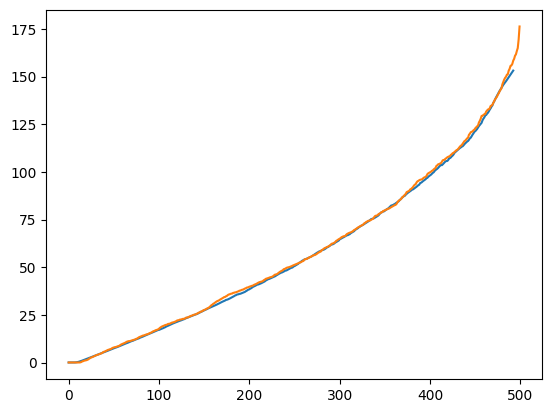

In [18]:
#k=8
ground_truth=[]
preds=[]
losses=[]
with torch.no_grad():
    for im_tst,speed_tst in test_dataloader:
    # Forward pass
        outputs_tst = model(im_tst.to(device))
        #loss2 = criterion(outputs_tst, speed_tst.to(device))
        out_vecs=[]
        for k in range(len(outputs_tst)):
            out = outputs_tst[k,:].cpu().detach().squeeze()
            #
            
            def rolling_mean(matrix, window):
                df = pd.DataFrame(matrix)
                return df.rolling(window=window).mean().dropna().to_numpy()
            out_mean = rolling_mean(out,8)
            out_mean[out_mean<0]=0.001
            out_vecs.append(out_mean)
       # losses.append(loss2.item())
        preds.append(out_vecs)
        ground_truth.append(speed_tst.numpy())
    # for i in out:
#     if (i>.03)&(count<400):
#         out[:,count
#     count+=1
plt.plot(out_mean)
plt.plot(speed_tst[k])

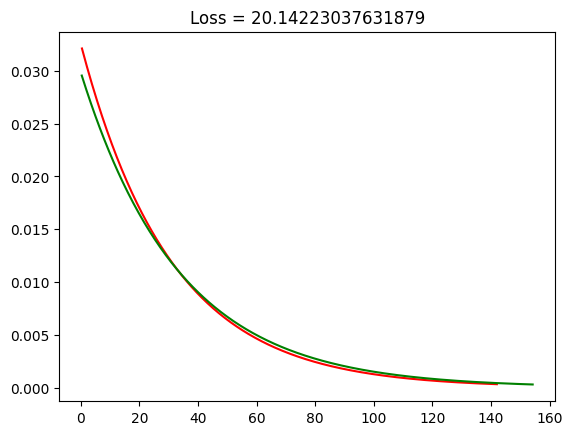

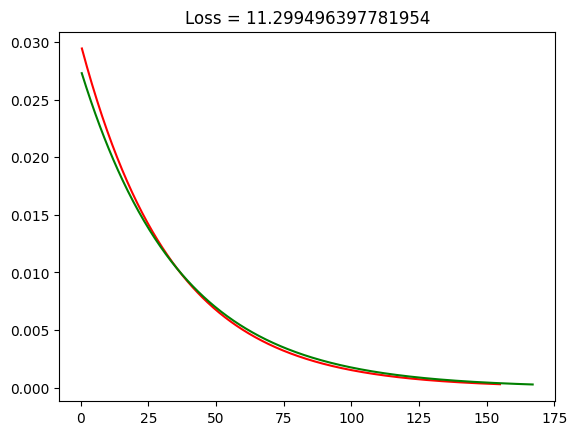

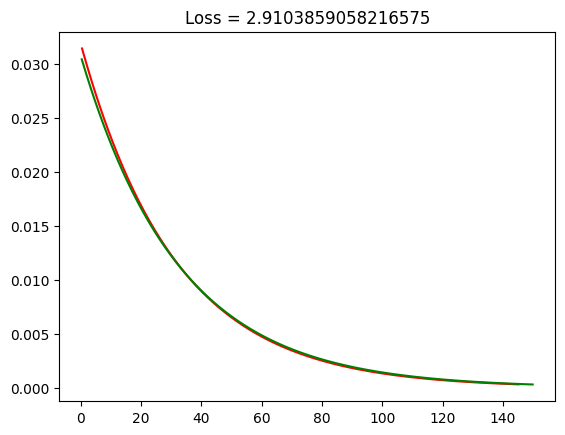

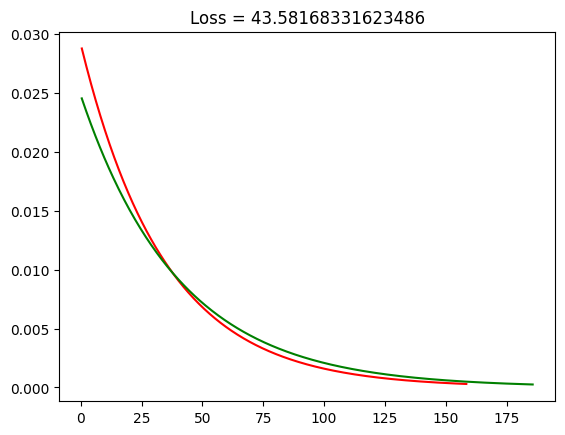

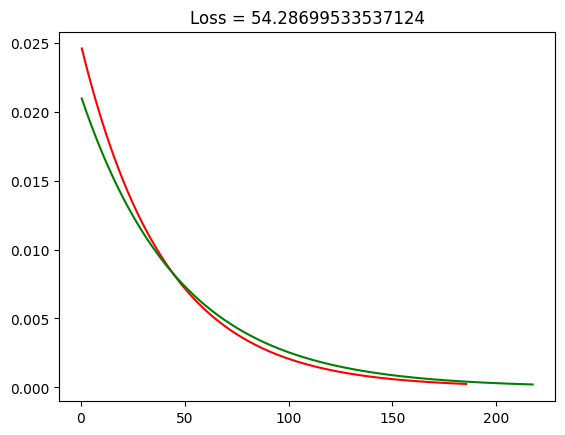

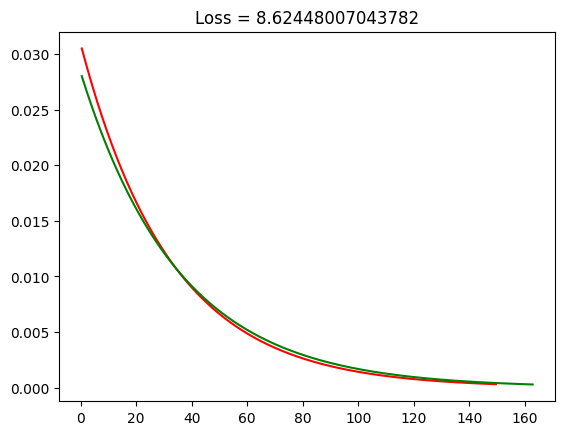

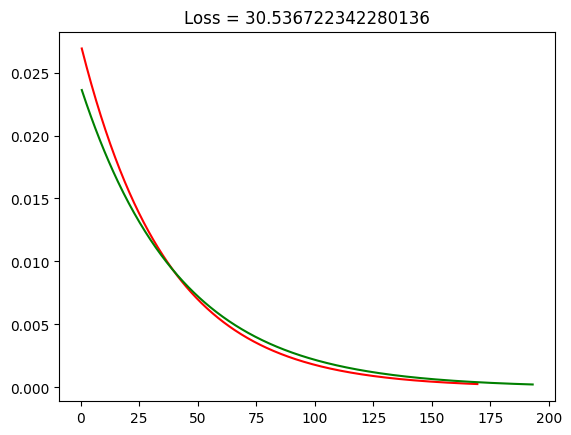

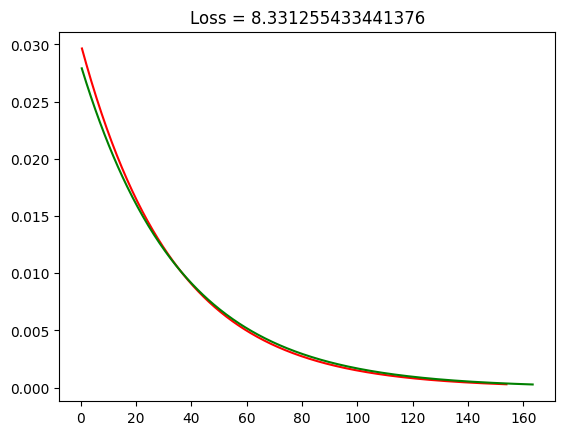

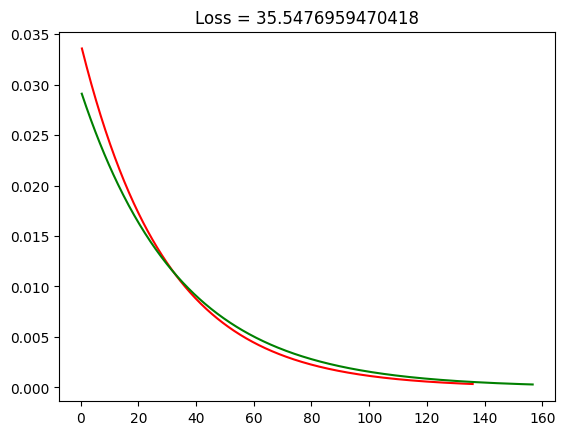

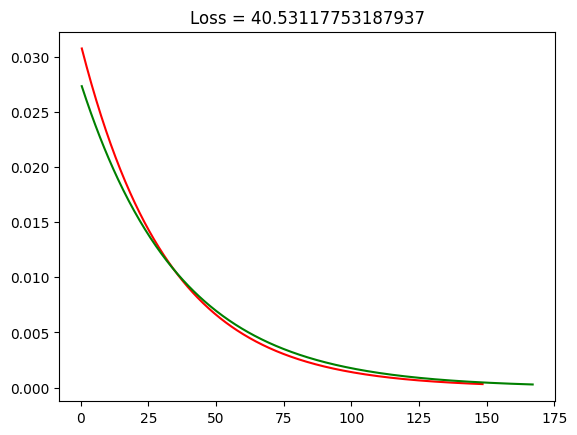

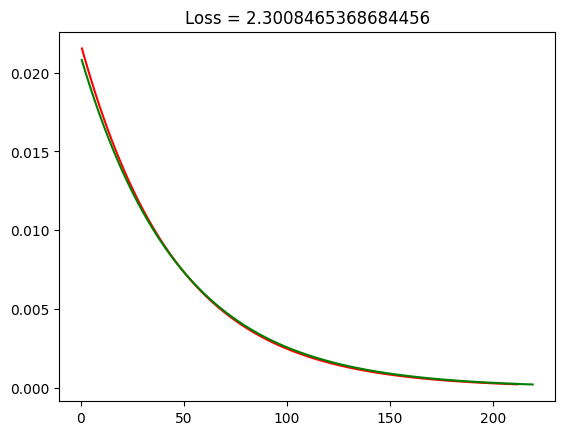

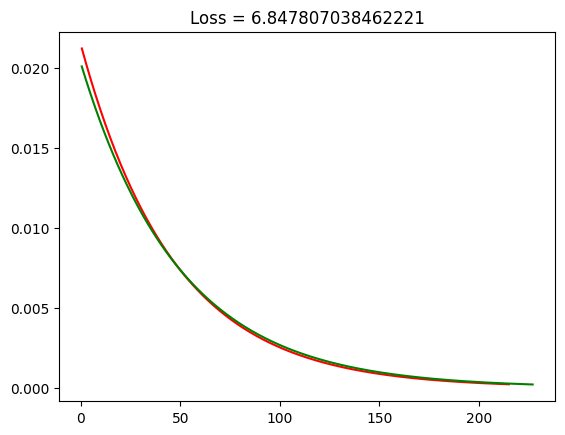

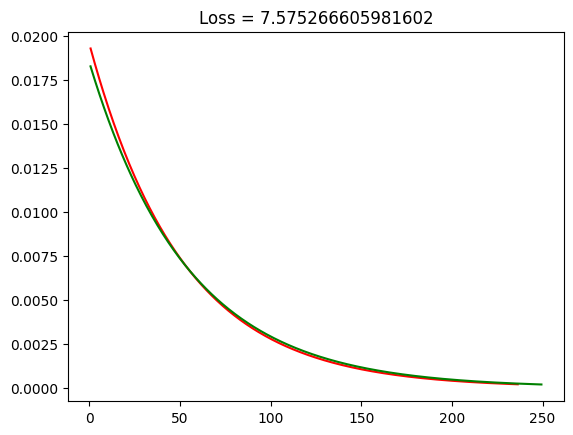

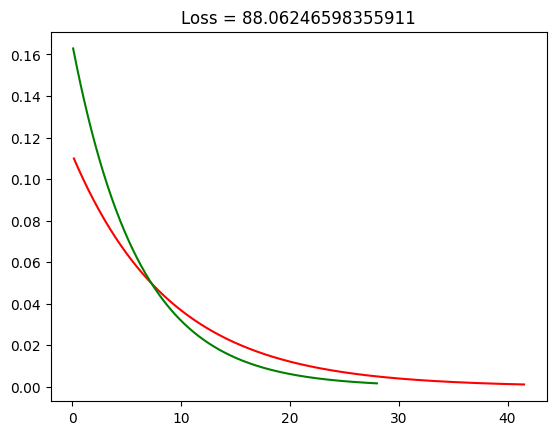

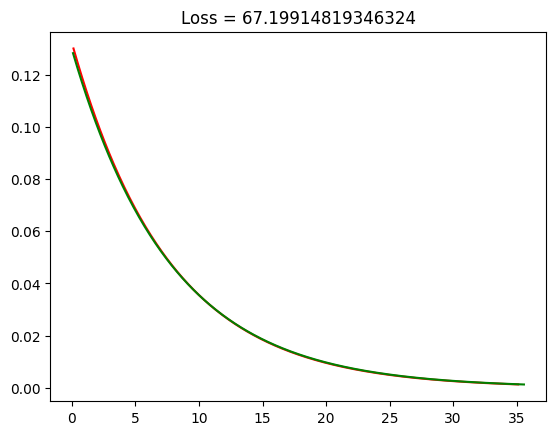

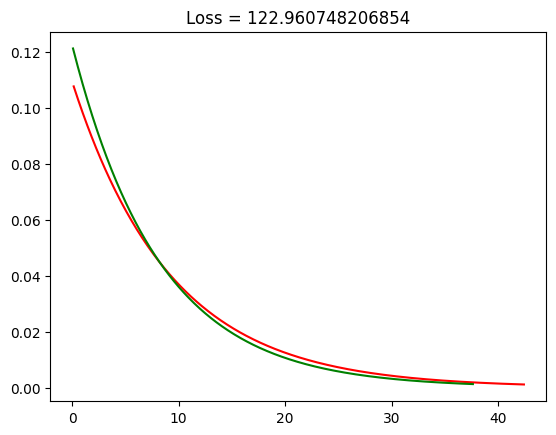

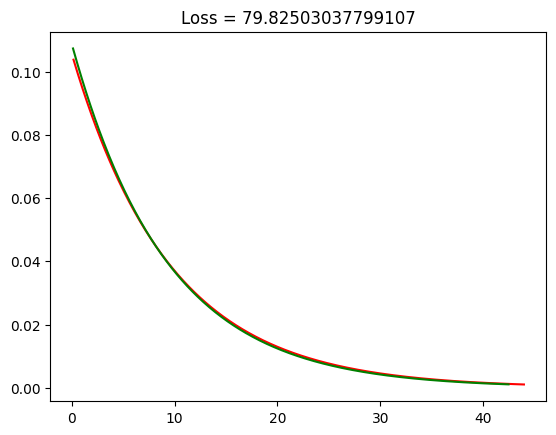

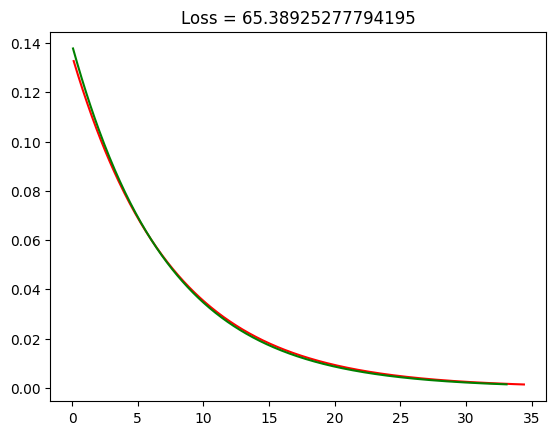

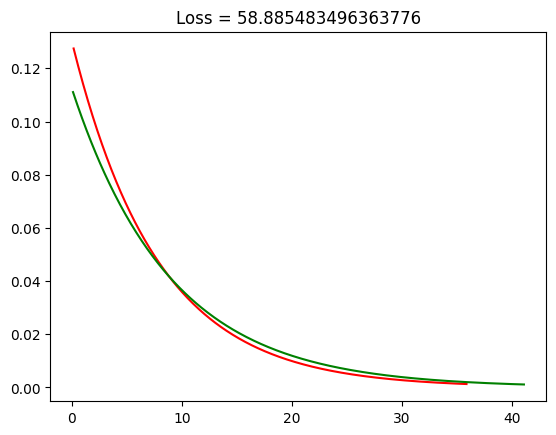

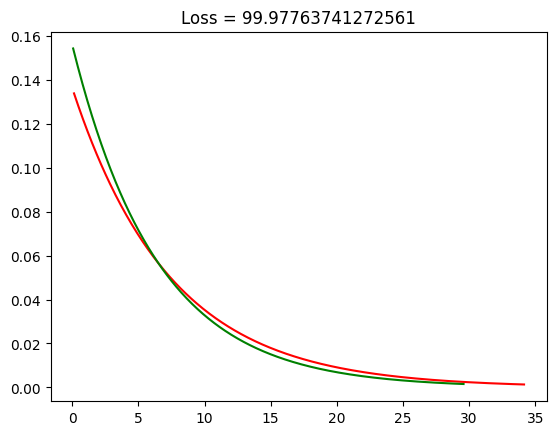

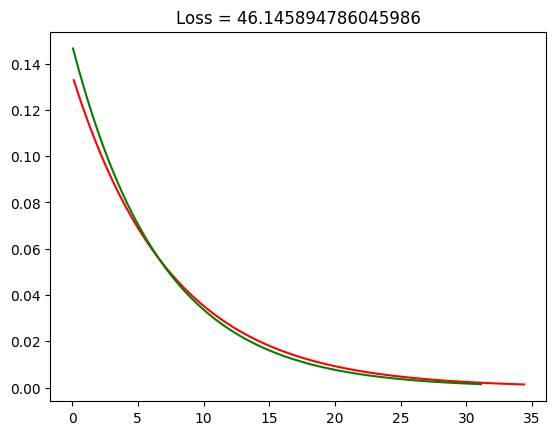

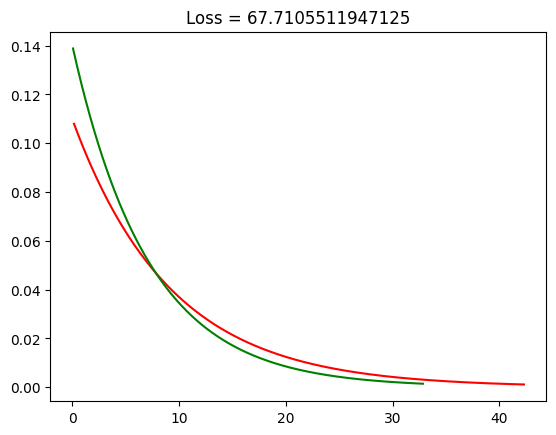

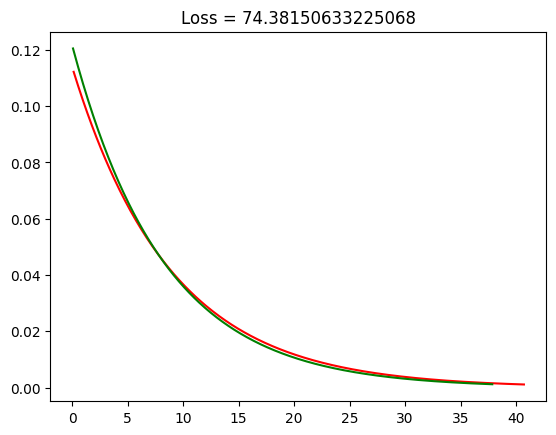

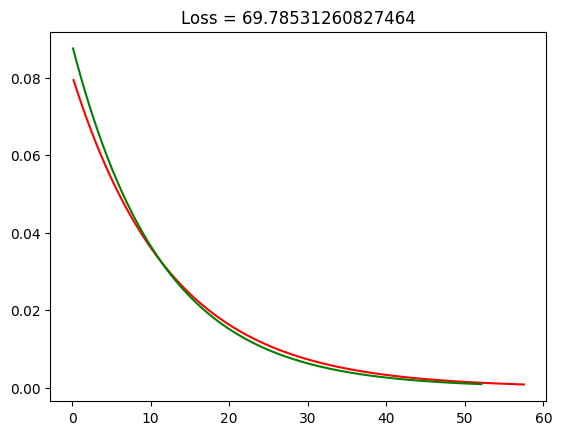

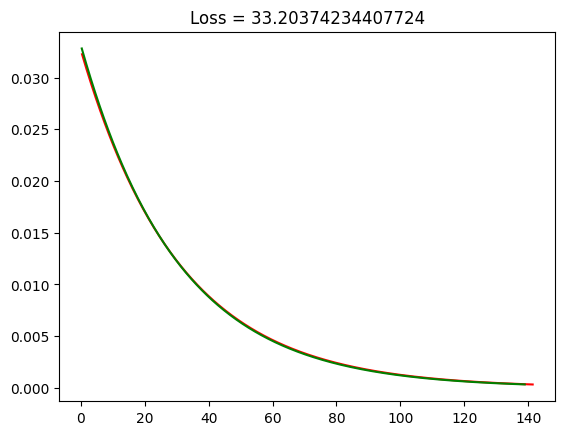

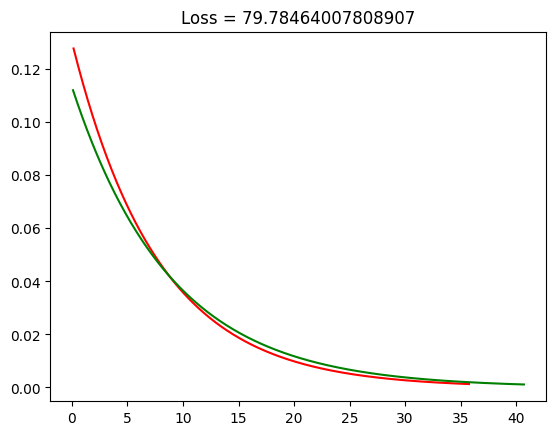

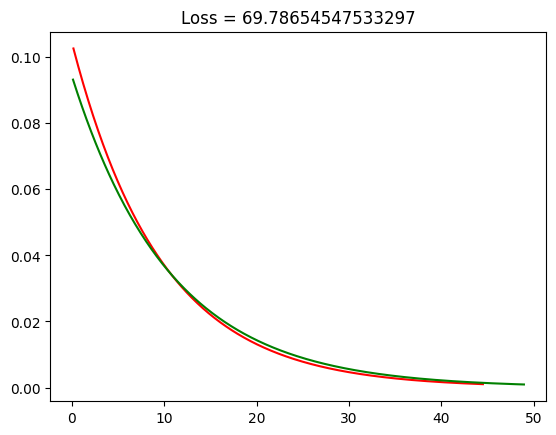

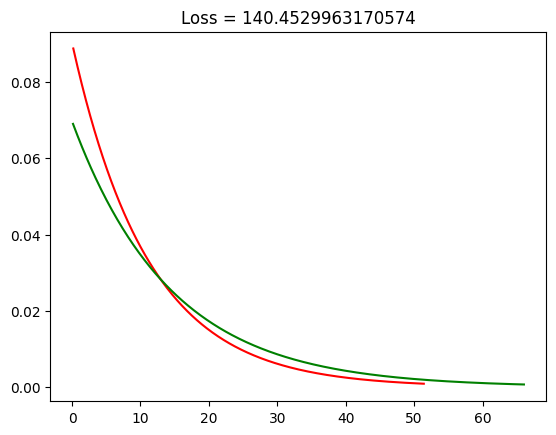

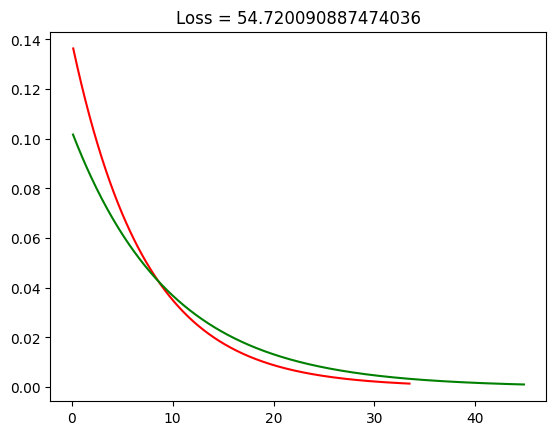

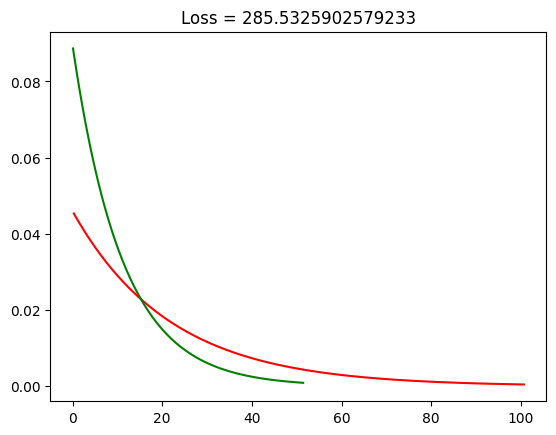

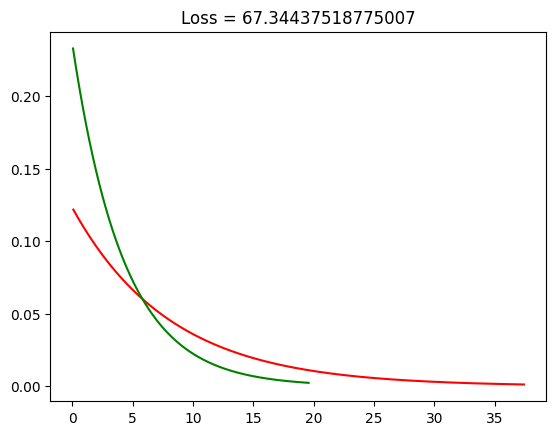

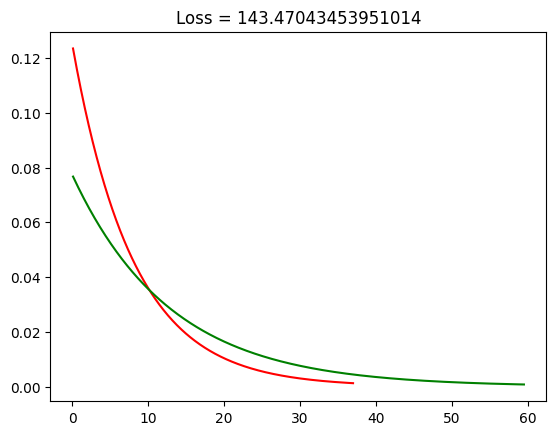

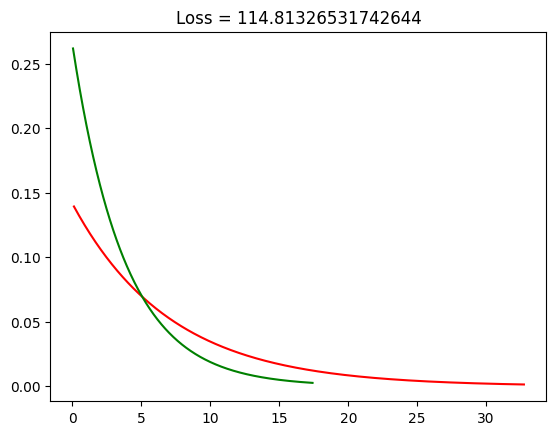

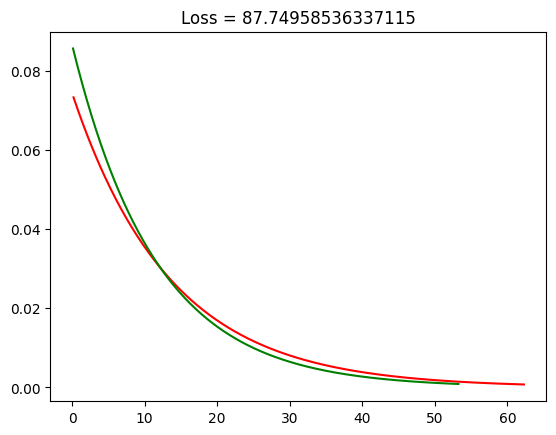

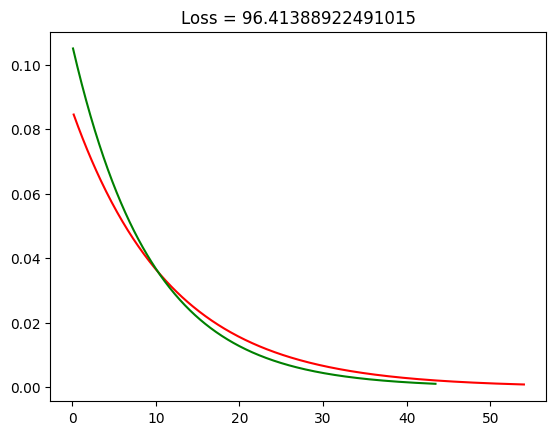

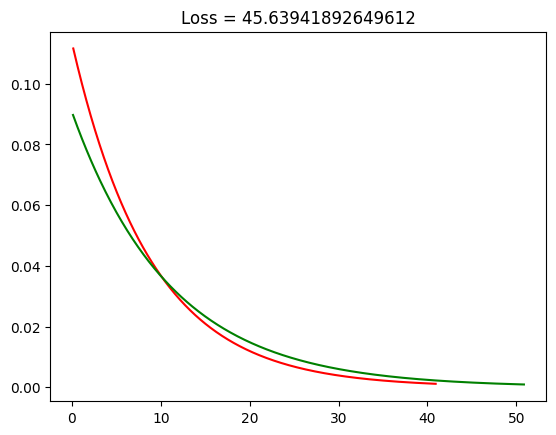

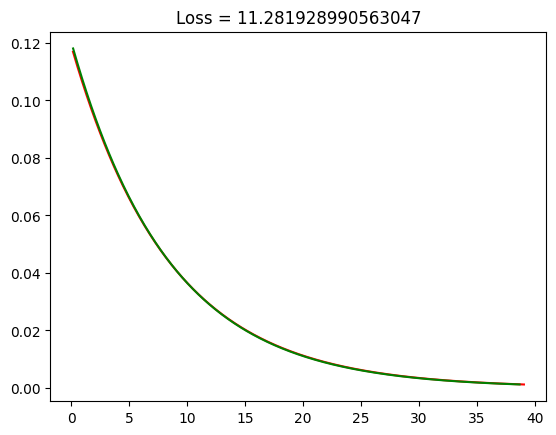

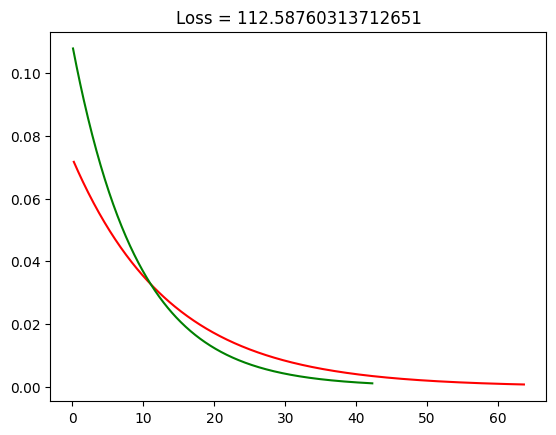

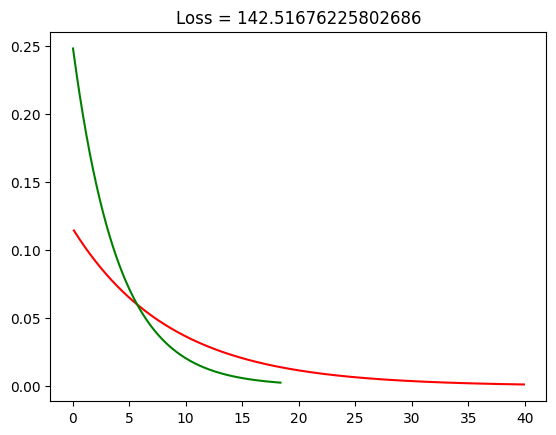

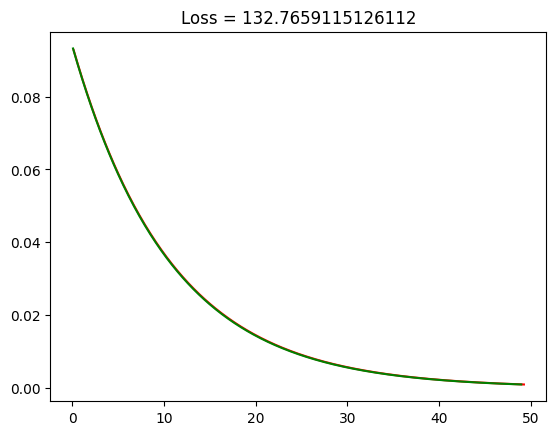

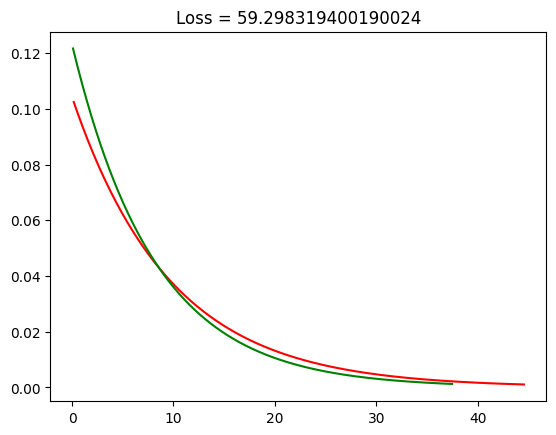

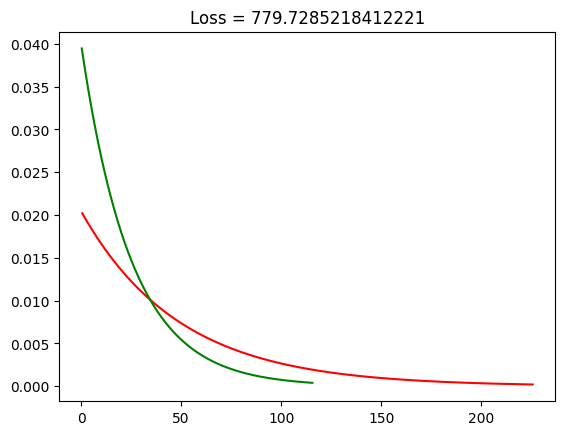

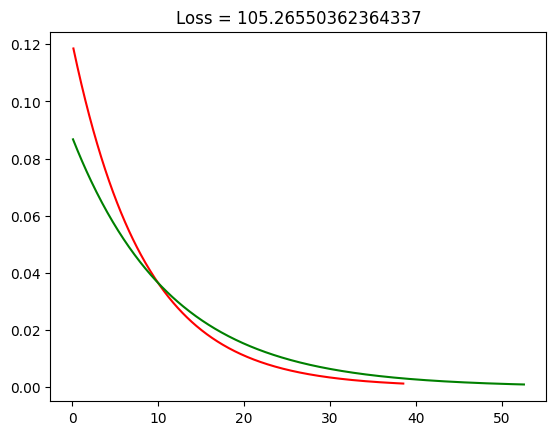

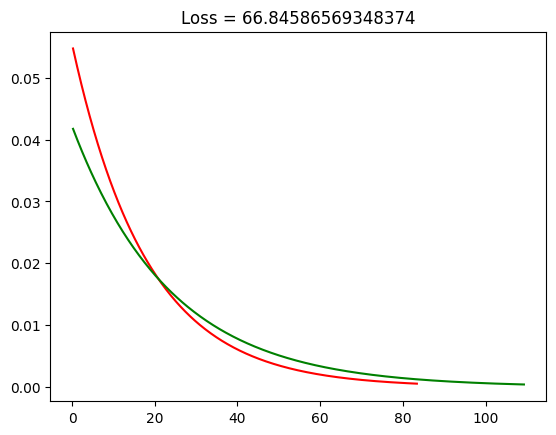

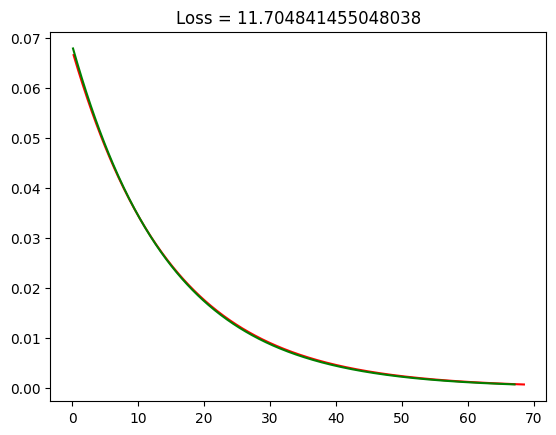

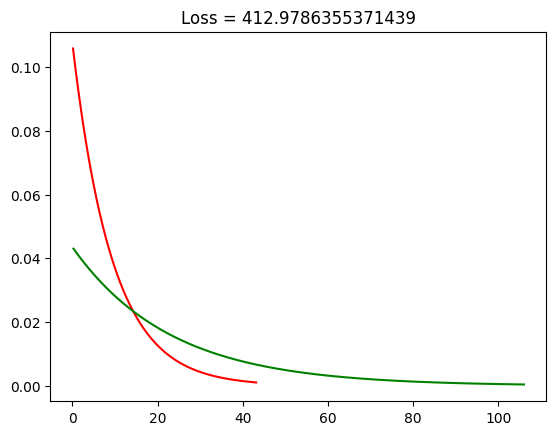

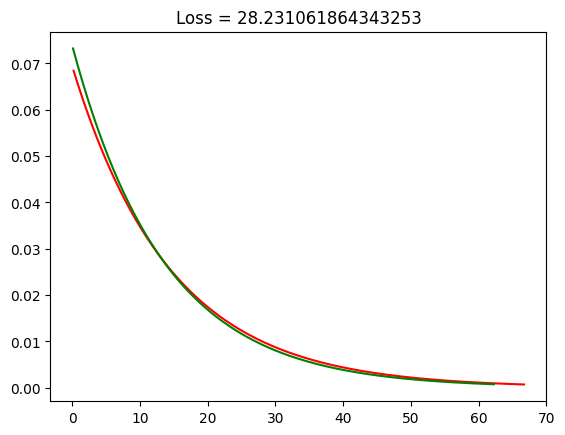

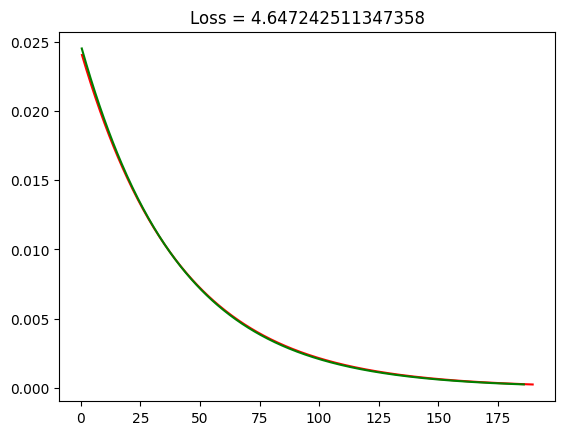

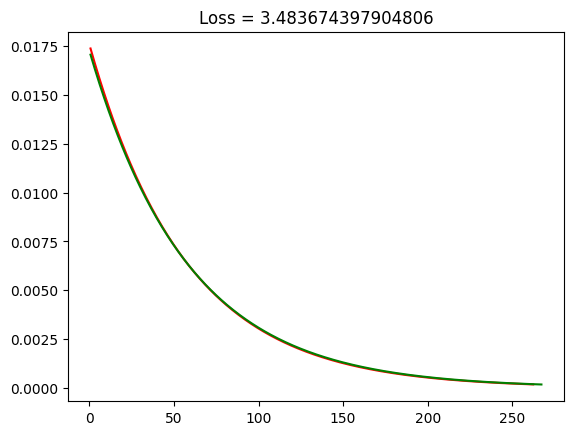

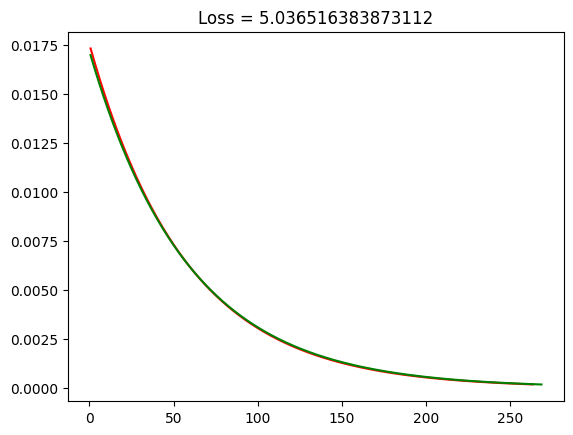

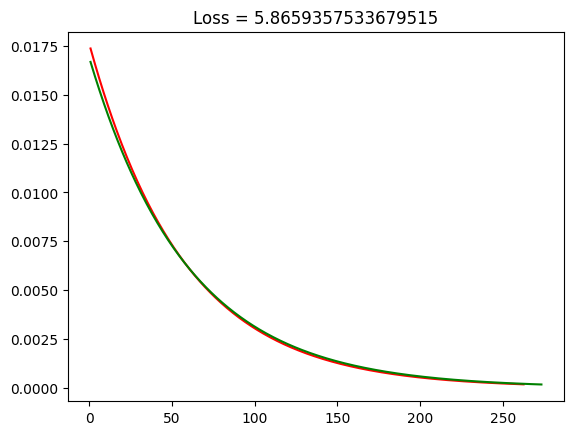

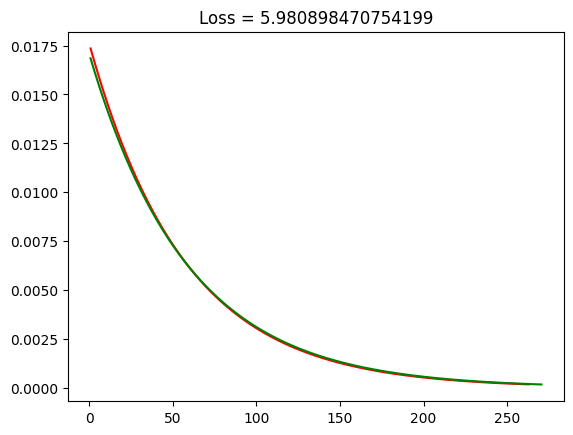

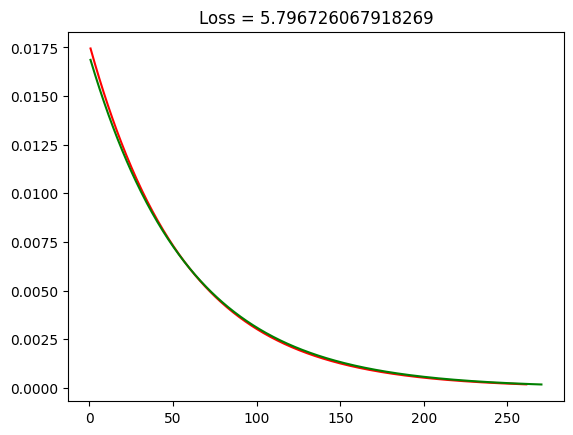

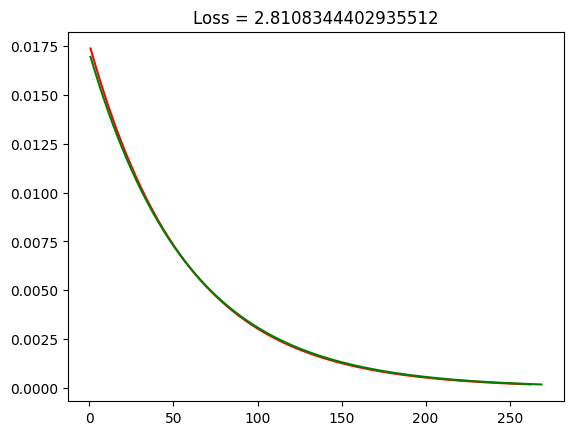

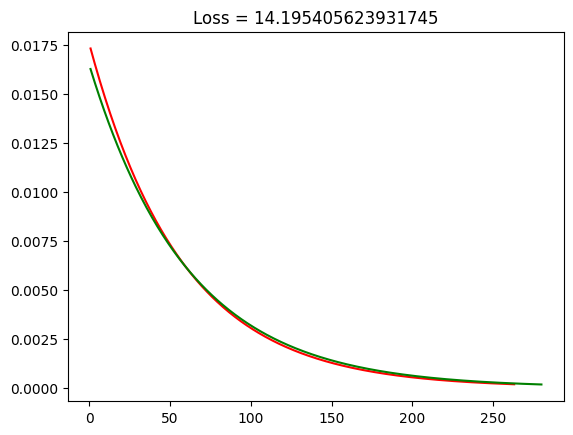

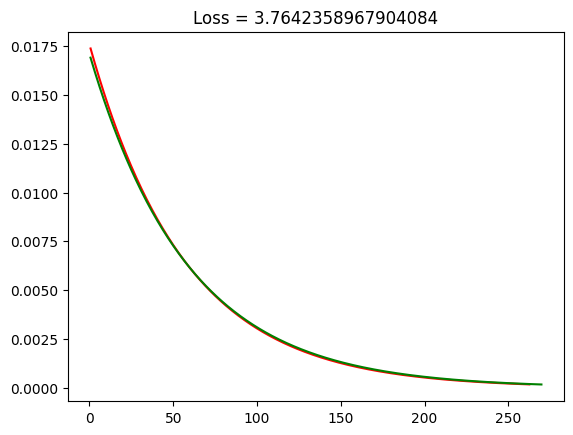

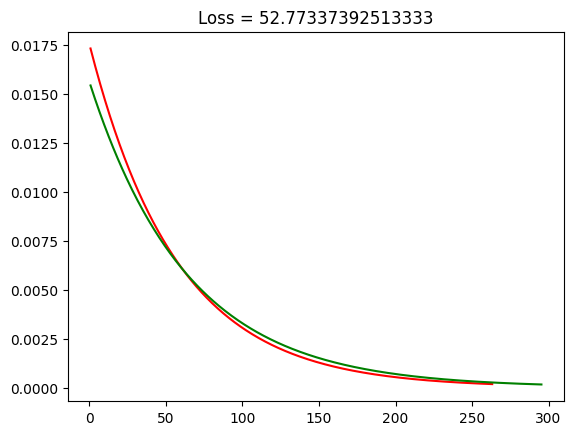

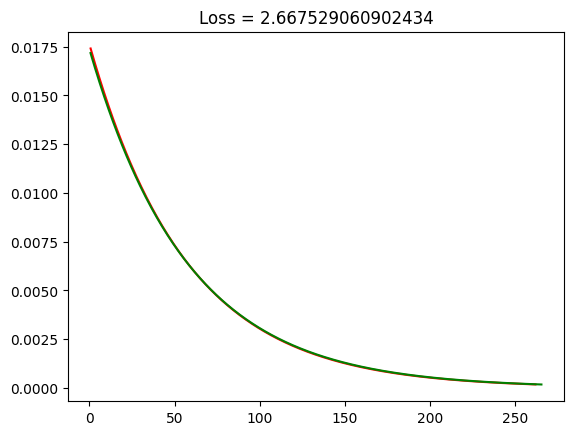

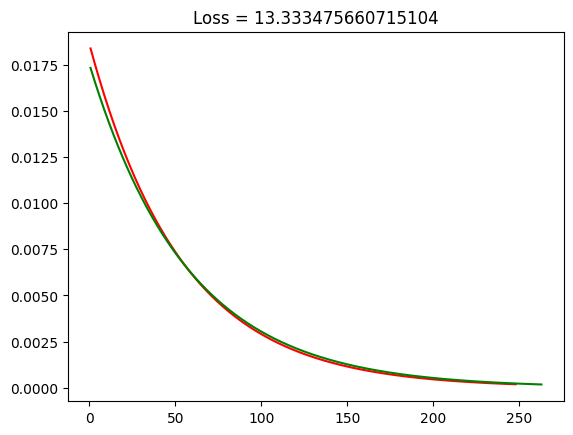

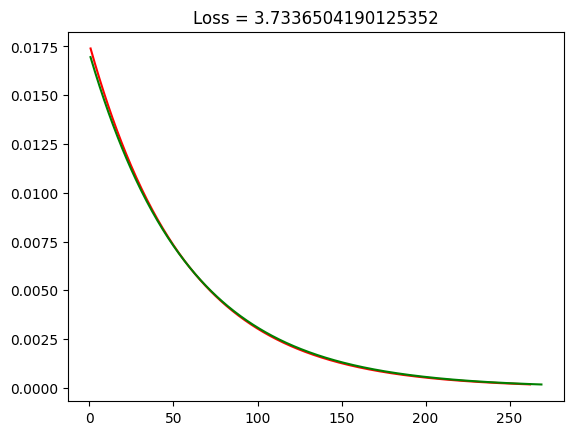

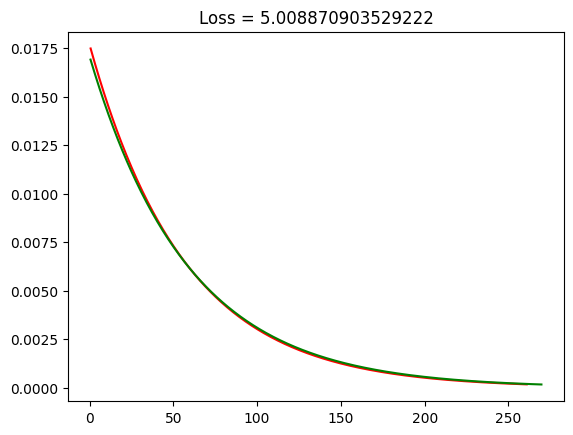

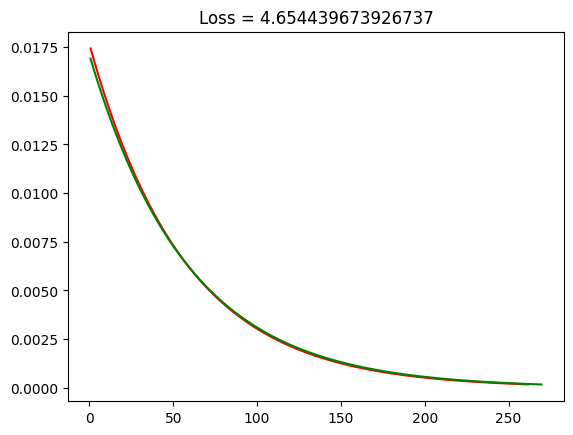

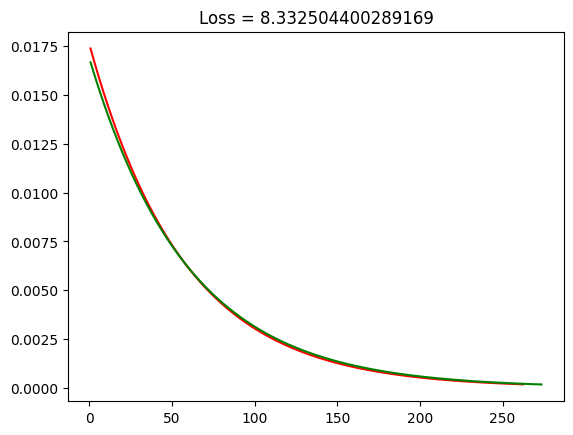

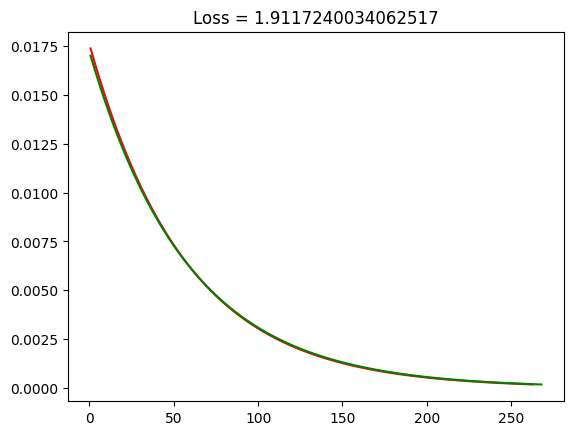

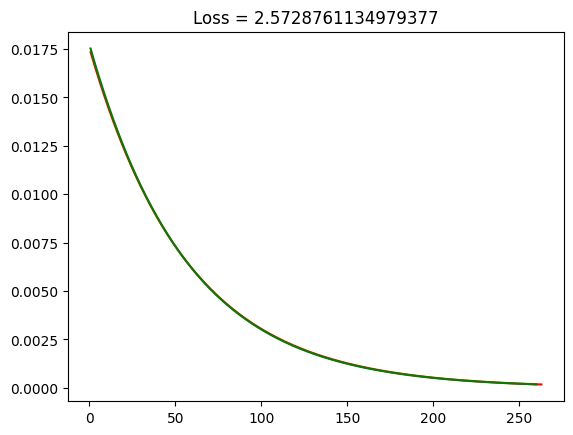

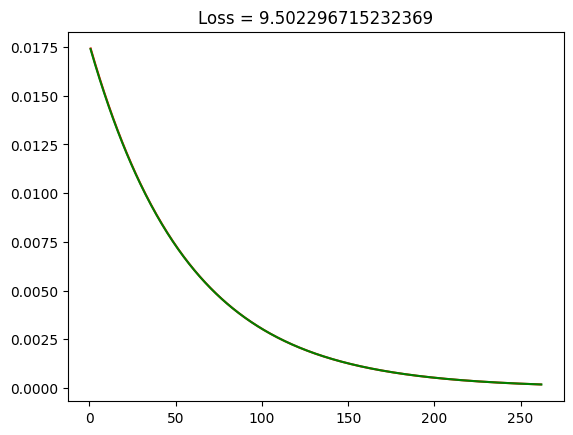

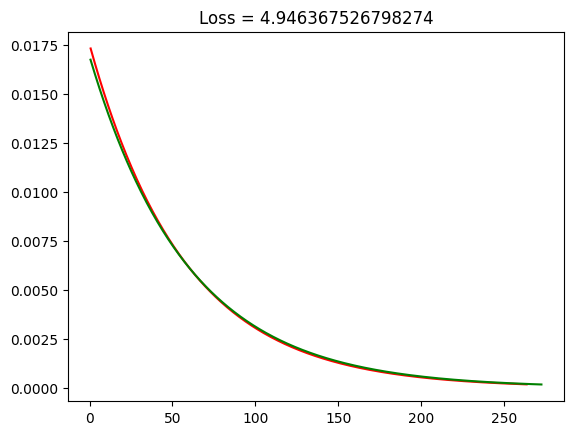

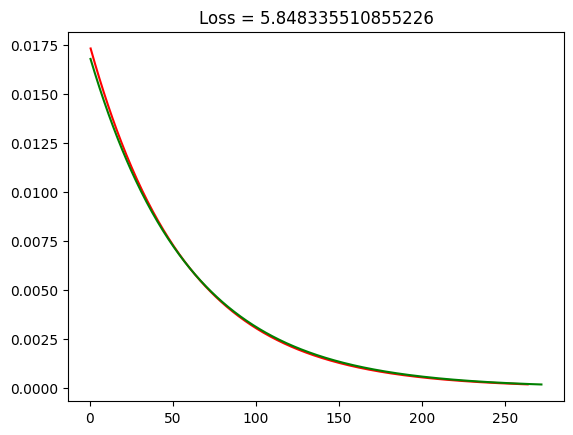

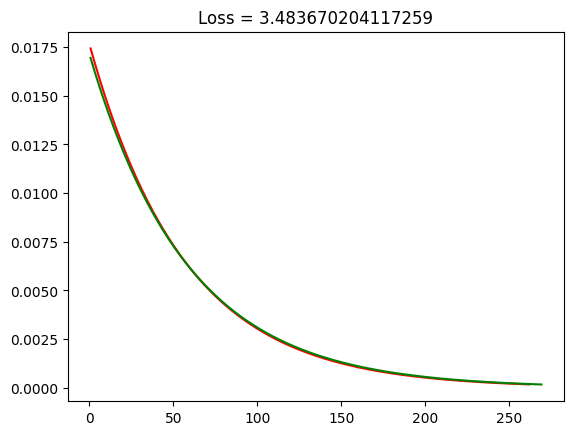

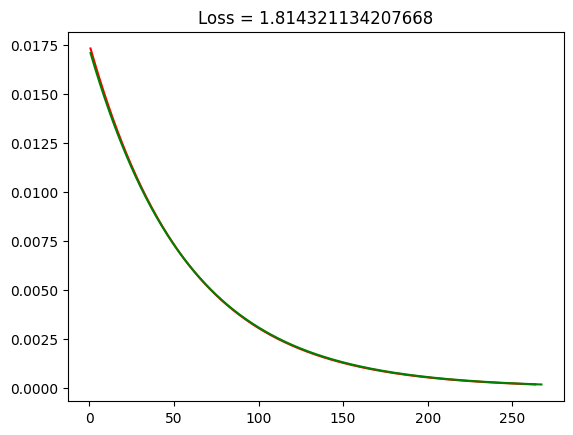

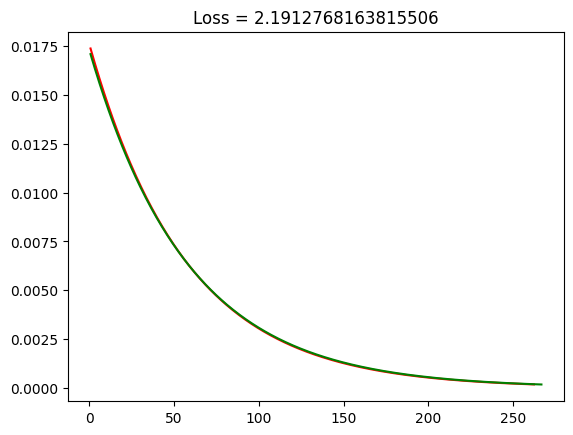

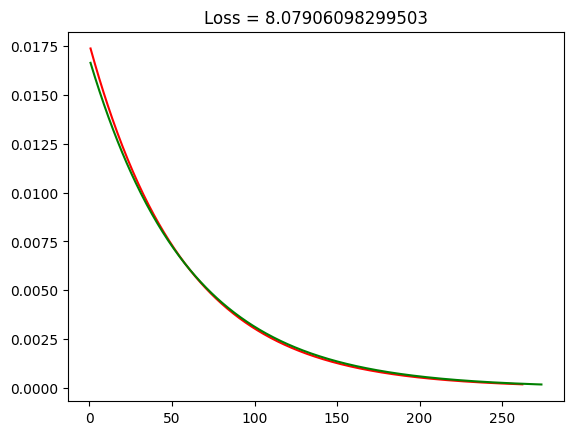

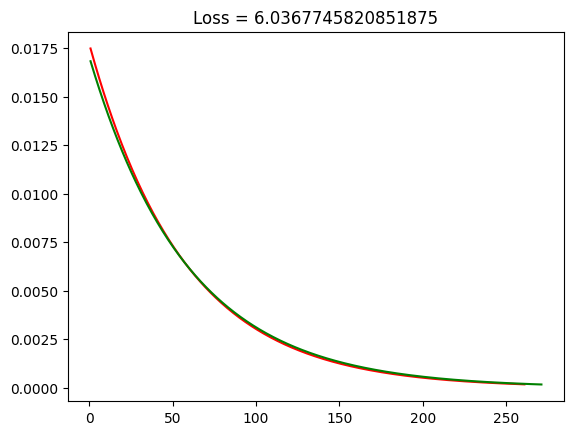

60.046953707125894

In [26]:
len(preds)
losses=[]
full_preds=[]
criterion = nn.MSELoss()
#ground_truth[-1].shape
for i in range(len(preds)):
    for j in range(len(preds[i])):
        pred = preds[i][j]#(.00*preds1[i][j]+0.3*preds2[i][j]+.7*preds3[i][j])
        a,b = expon.fit(pred)

        xtorch= np.linspace(expon.ppf(0.01, a,b),
                        expon.ppf(0.99, a,b), target_length)
        distr_torch=expon.pdf(xtorch, a,b)
        plt.plot(xtorch,distr_torch,c='r')
        
        a,b = expon.fit(ground_truth[i][j,:])
        xtorch= np.linspace(expon.ppf(0.01, a,b),
                        expon.ppf(0.99, a,b), target_length)
        distr_torch=expon.pdf(xtorch, a,b)
        plt.plot(xtorch,distr_torch,c='g')
        #plt.xlim([0,30])
        #plt.ylim([0,.6])
        full_preds.append(pred)
        loss = criterion(torch.tensor(pred.squeeze()), torch.tensor(ground_truth[i][j,4:-3]))
        losses.append(loss.item())
        plt.title('Loss = '+str(loss.item()))
        plt.show()
        
np.mean(losses)
#ground_truth[0].shape

In [21]:
flat_pred = np.vstack(full_preds)
flat_pred=np.reshape(flat_pred,[-1,])
flat_pred.shape

(35989,)

In [22]:
flat_gt = np.vstack(ground_truth)
flat_gt=np.reshape(flat_gt,[-1,])
flat_gt.shape

(36500,)

0.0009058387950062752 32.24117408437434
6.72686510370113e-05 33.008846282958984


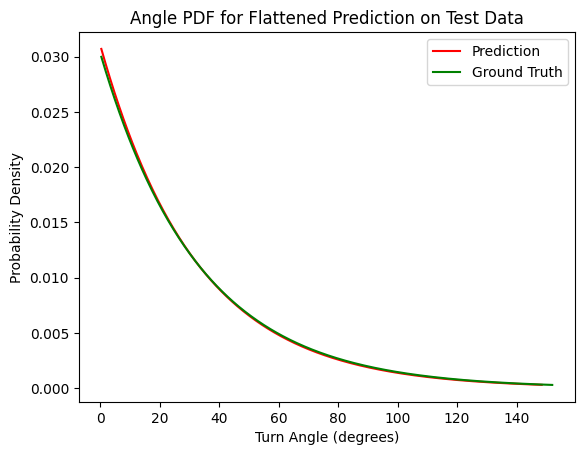

In [25]:
a,b = expon.fit(flat_pred)
#c=c+.4
#a=a+.1
# Generate points for plotting the fitted distribution
xtorch= np.linspace(expon.ppf(0.01, a,b),
                expon.ppf(0.99, a,b), target_length)

distr_torch=expon.pdf(xtorch, a,b)
print(a,b)
# scales[i,:] = torch.tensor([a,b,c])
plt.plot(xtorch,distr_torch,c='r')


a,b = expon.fit(flat_gt)
    
# Generate points for plotting the fitted distribution
xtorch= np.linspace(expon.ppf(0.01, a,b),
                expon.ppf(0.99, a,b), target_length)

distr_torch=expon.pdf(xtorch, a,b)
print(a,b)

# scales[i,:] = torch.tensor([a,b,c])
plt.plot(xtorch,distr_torch,c='g')
plt.title('Angle PDF for Flattened Prediction on Test Data')
plt.xlabel('Turn Angle (degrees)')
plt.ylabel('Probability Density')
plt.legend(['Prediction', 'Ground Truth'])


In [35]:
criterion(outputs_tst, speed_tst.to(device))

tensor(10.7605, device='cuda:0')

In [43]:
outputs_tst

tensor([[-3.6606e-04, -1.1973e-03,  4.5290e-03,  ...,  2.3624e-01,
          2.4830e-01,  3.2491e-01],
        [ 1.1595e-04,  5.3141e-04,  3.8370e-03,  ...,  3.3265e-01,
          3.6238e-01,  4.5133e-01],
        [-3.1799e-04, -1.0315e-03,  4.4717e-03,  ...,  2.4626e-01,
          2.6008e-01,  3.3805e-01],
        [-6.0153e-05, -1.3037e-04,  4.1123e-03,  ...,  2.9629e-01,
          3.1932e-01,  4.0370e-01]], device='cuda:0')

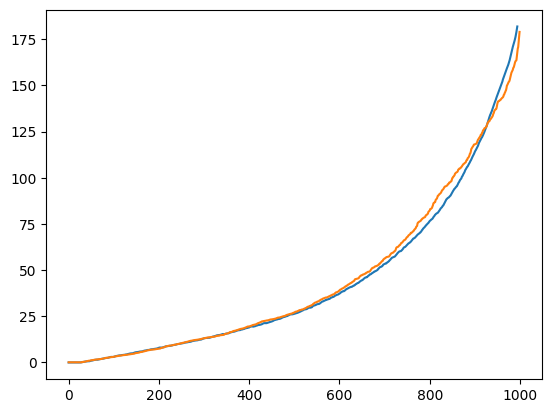

In [42]:
k=3
out = outputs_tst[k,:].cpu().detach().squeeze()
#

def rolling_mean(matrix, window):
    df = pd.DataFrame(matrix)
    return df.rolling(window=window).mean().dropna().to_numpy()
out_mean = rolling_mean(out,6)
out_mean[out_mean<0]=0.001
    # for i in out:
#     if (i>.03)&(count<400):
#         out[:,count
#     count+=1
plt.plot(out_mean)
plt.plot(speed_tst[k])



42.69380407734053
0.0006379823510845503 42.693166094989444
[42.87741]
[0.0655963] [42.811813]
[0.0655963] [42.811813]
44.414356674999
0.03902479633688927 44.37533187866211


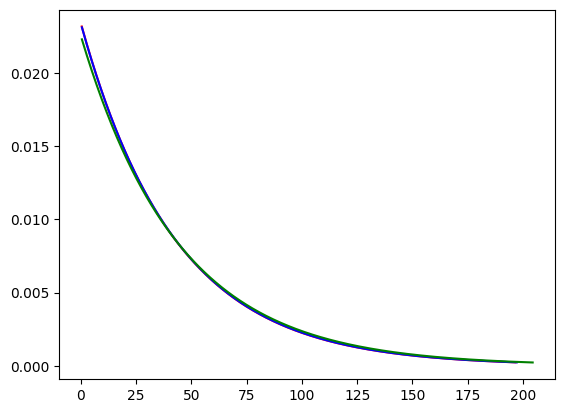

In [43]:
a,b = expon.fit(out_mean)
#c=c+.4
#a=a+.1
# Generate points for plotting the fitted distribution
xtorch= np.linspace(expon.ppf(0.01, a,b),
                expon.ppf(0.99, a,b), target_length)

distr_torch=expon.pdf(xtorch, a,b)
print(a+b)
print(a,b)
# scales[i,:] = torch.tensor([a,b,c])
plt.plot(xtorch,distr_torch,c='r')

a = (3*a_tst[k].cpu().detach().numpy()+a)/4
b = (3*b_tst[k].cpu().detach().numpy()+b)/4
print(a+b)
print(a,b)
xtorch= np.linspace(expon.ppf(0.01, a,b),
                expon.ppf(0.99, a,b), target_length)

distr_torch=expon.pdf(xtorch, a,b)
print(a,b)
# scales[i,:] = torch.tensor([a,b,c])
plt.plot(xtorch,distr_torch,c='b')

a,b = expon.fit(speed_tst[k])
    
# Generate points for plotting the fitted distribution
xtorch= np.linspace(expon.ppf(0.01, a,b),
                expon.ppf(0.99, a,b), target_length)

distr_torch=expon.pdf(xtorch, a,b)
print(a+b)
print(a,b)

# scales[i,:] = torch.tensor([a,b,c])
plt.plot(xtorch,distr_torch,c='g')

In [20]:
torch.save(model.state_dict(), 'turn_angle_model_Volod1_384_dispBrown')

In [39]:
(b_tst[k].cpu().detach().numpy()+b)/2

array([-0.16220948], dtype=float32)

In [40]:
(c_tst[k].cpu().detach().numpy()+c)/2

array([2.6426258], dtype=float32)

In [26]:
# [ 1.2188,  0.0247, 11.8741]
# [1.2127, 0.0080, 6.0299]
# [1.2127, 0.0316, 6.0299]
s1 = scale_tst[:,0]#*1.2127
s2 = scale_tst[:,1]#*0.0316
s3 = scale_tst[:,2]#*6.0299

out1 = outputs_tst.cpu().detach().numpy()[:,0]#*1.2127
out2 = outputs_tst.cpu().detach().numpy()[:,1]#*0.0316
out3 = outputs_tst.cpu().detach().numpy()[:,2]#*6.0299


In [24]:
k=0
x_shape= torch.tensor(np.linspace(lognorm.ppf(0.01, out1[k], out2[k], out3[k]),
                    lognorm.ppf(0.99,  out1[k], out2[k], out3[k]), 100))

x_distr=torch.tensor(lognorm.pdf(x_shape,  out1[k], out2[k], out3[k]))

In [27]:
x_shape_or= torch.tensor(np.linspace(lognorm.ppf(0.01, s1[k], s2[k], s3[k]),
                    lognorm.ppf(0.99,  s1[k], s2[k], s3[k]), 100))

x_distr_or=torch.tensor(lognorm.pdf(x_shape,  s1[k], s2[k], s3[k]))

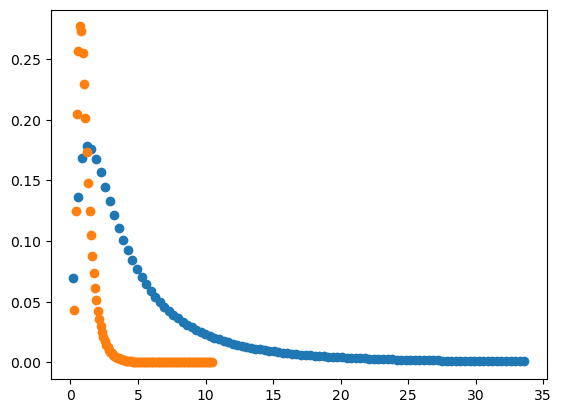

In [30]:
plt.scatter(x_shape,x_distr)
plt.scatter(x_shape_or,x_distr_or)

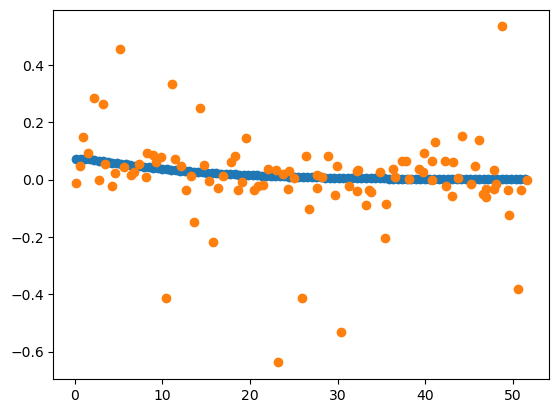

In [12]:
plt.scatter(xt.cpu().detach().numpy(),lab.cpu().detach().numpy())
plt.scatter(outputs[0].cpu().detach().numpy(),outputs[1].cpu().detach().numpy())

In [8]:
torch.save(model.state_dict(), 'weights_3_9_2')

In [7]:
dataset_test = CustomDataset(images3, coords_test)
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=True)
model.eval()
running_loss2=0
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        #labels= labels.to(device)
        #lab = torch.mean(lab, dim=(2,3)).squeeze()

        outp = model(inputs)  
        test_loss = criterion(outp, labels.to(device))
        running_loss2 += test_loss.item()
epoch_loss2 = running_loss2 / len(test_dataloader)
epoch_loss2

340231.74375

In [ ]:
# next(iter(dataloader))
ina.shape

In [ ]:
outp



In [ ]:
for i in range(672):
    print(torch.nan_to_num(xc_data[0:14,i]))

In [8]:
np_out = np.array(outp.cpu().detach())
np_out[np_out<=20]=np.nan
np_out.shape


(10, 2000, 2)

In [9]:
np_lab = np.array(labels.detach())
np_lab[np_lab==0]=np.nan


In [12]:
np_lab

array([[[360.78415, 335.69382],
        [      nan,       nan],
        [      nan,       nan],
        ...,
        [      nan,       nan],
        [      nan,       nan],
        [      nan,       nan]],

       [[377.5993 , 342.52182],
        [      nan,       nan],
        [      nan,       nan],
        ...,
        [      nan,       nan],
        [      nan,       nan],
        [      nan,       nan]],

       [[395.49115, 347.76654],
        [      nan,       nan],
        [      nan,       nan],
        ...,
        [      nan,       nan],
        [      nan,       nan],
        [      nan,       nan]],

       [[415.54092, 350.15506],
        [      nan,       nan],
        [      nan,       nan],
        ...,
        [      nan,       nan],
        [      nan,       nan],
        [      nan,       nan]]], dtype=float32)

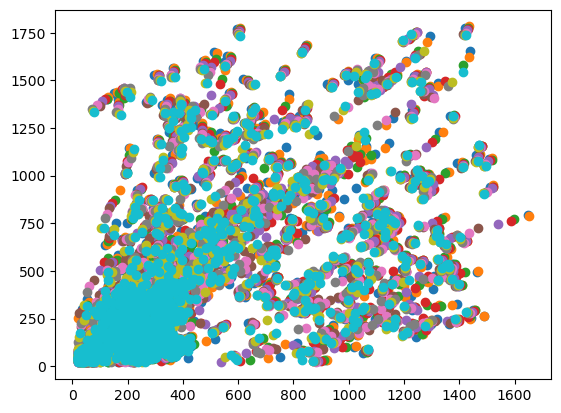

In [13]:
for i in range(np_out.shape[0]):
    plt.scatter(np_out[i,:,0],np_out[i,:,1])

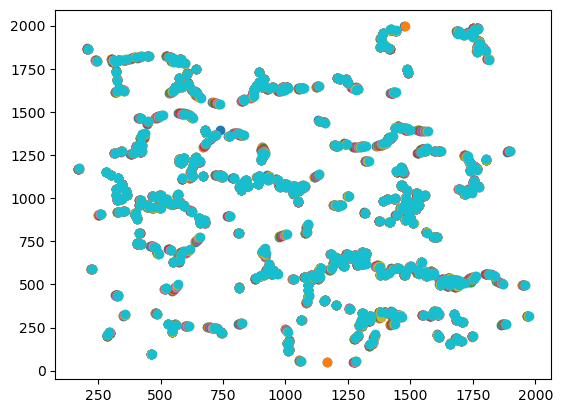

In [14]:
for i in range(np_lab.shape[0]):
    plt.scatter(np_lab[i,:,0],np_lab[i,:,1])

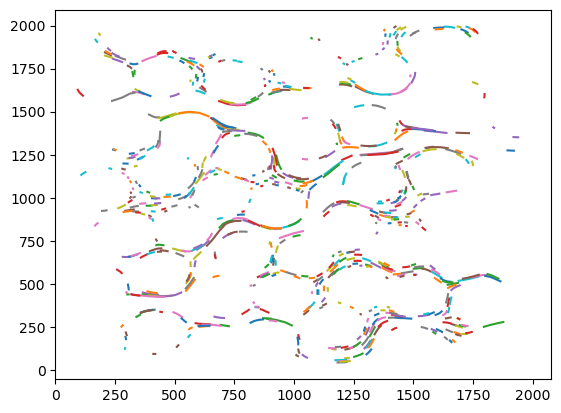

In [15]:
for i in range(np_lab.shape[1]):
    plt.plot(np_lab[:,i,0],np_lab[:,i,1])

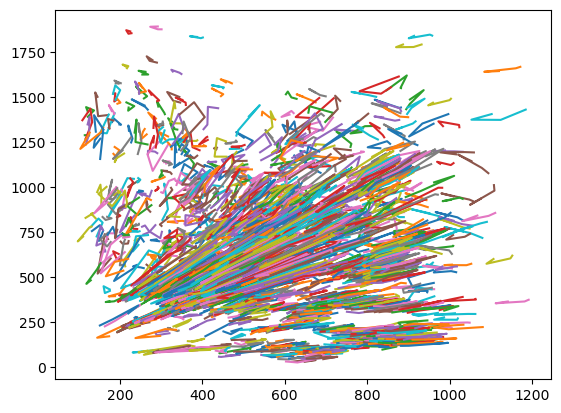

In [16]:
for i in range(np_out.shape[1]):
    plt.plot(np_out[:,i,0],np_out[:,i,1])

In [ ]:
plt.plot(np_lab[:,i,0],np_lab[:,i,1])
plt.plot(np_out[:,i,0],np_out[:,i,1])

In [ ]:
np_out[:,i,0]

In [ ]:
np_out[:,i,1]

In [ ]:
lab[:,0,0]